# #QuarentenaDados

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Reading [MovieLens](https://grouplens.org/datasets/movielens/) data

In [2]:
movies = pd.read_csv('../Files/movies.csv')
movies_ratings = pd.read_csv('../Files/ratings.csv')

In [3]:
average_ratings = movies_ratings.groupby('movieId')['rating'].mean()
movies = movies.join(average_ratings, on='movieId')

Average ratings of movie:  0    Toy Story (1995)
Name: title, dtype: object 3.9209302325581397


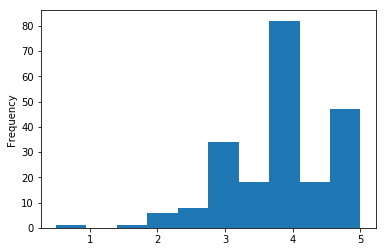

In [4]:
ratings_movie_1 = movies_ratings.query('movieId == 1')['rating']
print("Average ratings of movie: ", movies.query('movieId == 1')['title'], ratings_movie_1.mean())
ratings_movie_1.plot(kind='hist')
plt.show()

Average ratings of movie:  1    Jumanji (1995)
Name: title, dtype: object 3.4318181818181817


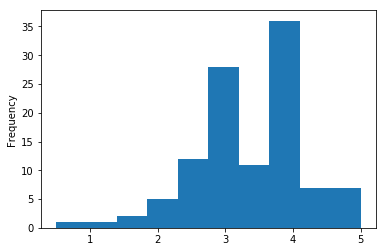

In [5]:
ratings_movie_1 = movies_ratings.query('movieId == 2')['rating']
print("Average ratings of movie: ", movies.query('movieId == 2')['title'], ratings_movie_1.mean())
ratings_movie_1.plot(kind='hist')
plt.show()

In [6]:
# Changes made to challenges 2, 3 and 4 of the first class

movies = movies.rename(columns={'rating': 'average_rating'})

number_of_ratings = movies_ratings.groupby('movieId')['rating'].count()
movies = movies.join(number_of_ratings, on='movieId')

movies = movies.rename(columns={'rating': 'number_of_ratings'})

movies['average_rating'] = movies['average_rating'].round(2)
movies.head()

,movieId,title,genres,average_rating,number_of_ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Challenge 1 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

Rotate the thicks (the names of the genres) of the green bar graph (the last one), in order to make the legends more readable.

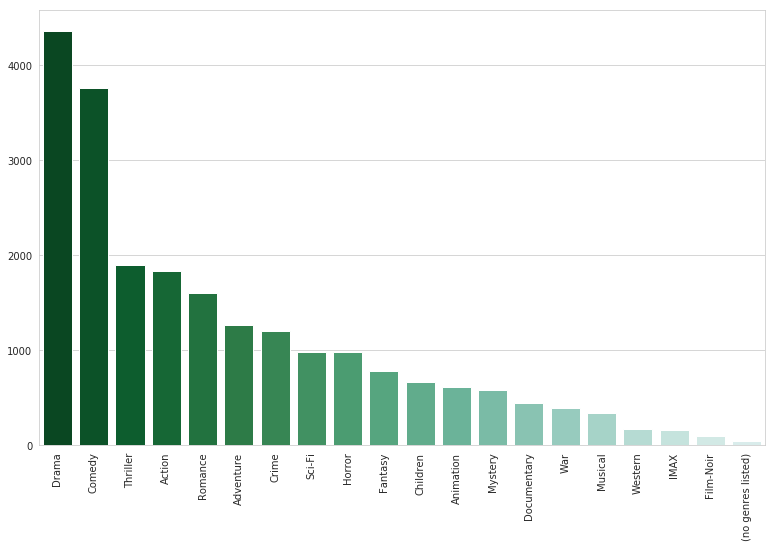

In [7]:
sns.set_style("whitegrid")

movies_by_genre = movies["genres"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(13,8))
sns.barplot(x=movies_by_genre.index,
            y=movies_by_genre.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(movies_by_genre) + 4))

plt.xticks(rotation=90)
plt.show()

## Challenge 2 by [Paulo Silveira](https://twitter.com/paulo_caelum)


To find several films with similar averages and different distributions, use the **movie_plot (n)** function to plot.

In [8]:
def movie_plot(n):
    find_id = 'movieId' + '==' + str(n)
    rating_movie = movies_ratings.query(find_id)["rating"]
    print('\n')
    print('Movie: ', filtered_movies.query(find_id)["title"])
    
    plt.figure(figsize = (13,8))
#     plt.subplot(1, 2, 1)
    rating_movie.plot(kind='hist')
    
#     plt.subplot(1, 2, 2)
#     rating_movie.plot.box(vert=False)
    plt.show()
    print(rating_movie.describe())

In [9]:
sorted_movies = movies.sort_values('average_rating', ascending=False)
filtered_movies = sorted_movies[(sorted_movies['average_rating'] >= 3.0) & (sorted_movies['average_rating'] <= 3.5)][1000:1050]
filtered_movies.head()

,movieId,title,genres,average_rating,number_of_ratings
551,661,James and the Giant Peach (1996),Adventure|Animation|Children|Fantasy|Musical,3.45,49.0
2808,3753,"Patriot, The (2000)",Action|Drama|War,3.45,68.0
9430,166461,Moana (2016),Adventure|Animation|Children|Comedy|Fantasy,3.45,10.0
513,596,Pinocchio (1940),Animation|Children|Fantasy|Musical,3.45,60.0
2537,3397,"Great Muppet Caper, The (1981)",Children|Comedy,3.45,11.0




Movie:  551    James and the Giant Peach (1996)
Name: title, dtype: object


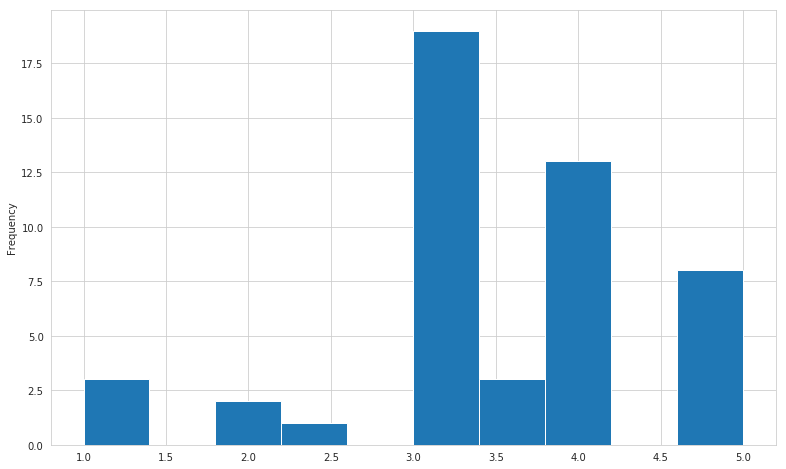

count    49.00000
mean      3.44898
std       1.02187
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       5.00000
Name: rating, dtype: float64


Movie:  2808    Patriot, The (2000)
Name: title, dtype: object


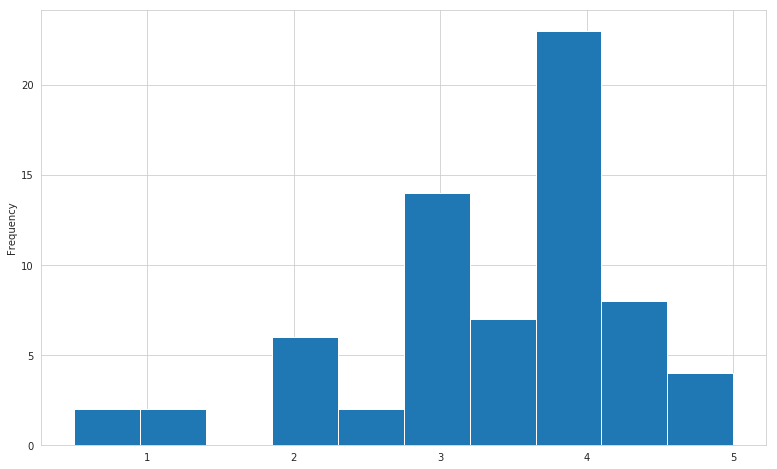

count    68.000000
mean      3.448529
std       1.037145
min       0.500000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  9430    Moana (2016)
Name: title, dtype: object


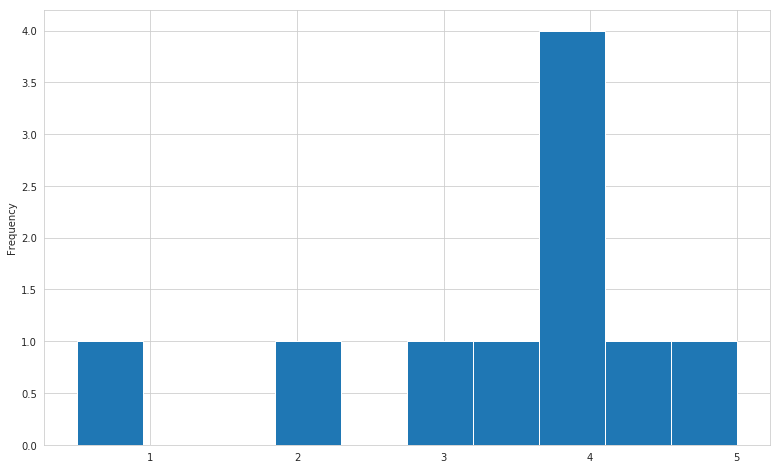

count    10.000000
mean      3.450000
std       1.321825
min       0.500000
25%       3.125000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  513    Pinocchio (1940)
Name: title, dtype: object


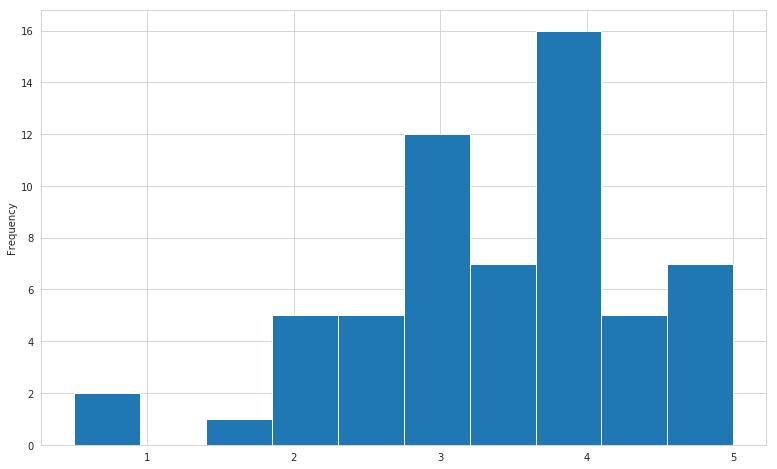

count    60.000000
mean      3.450000
std       1.056457
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  2537    Great Muppet Caper, The (1981)
Name: title, dtype: object


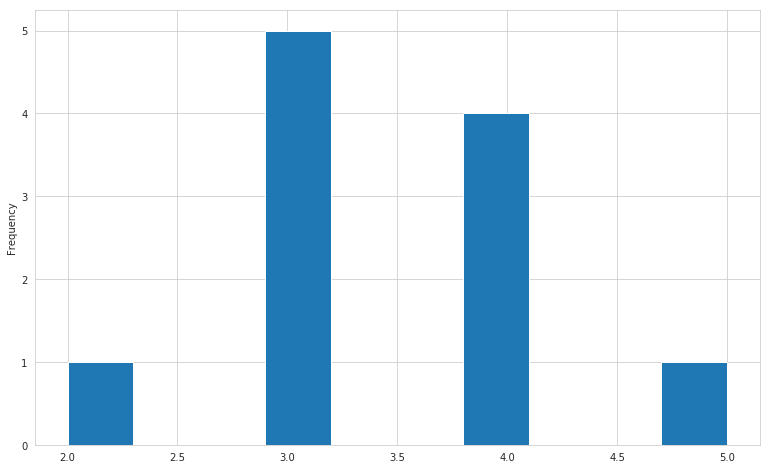

count    11.000000
mean      3.454545
std       0.820200
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  615    Independence Day (a.k.a. ID4) (1996)
Name: title, dtype: object


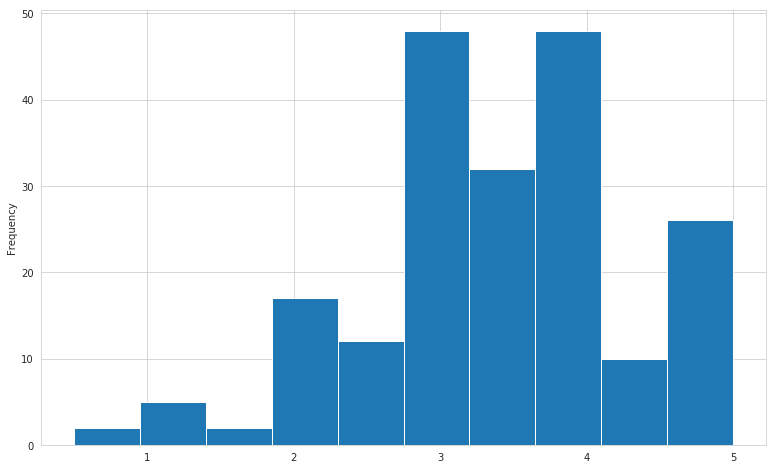

count    202.000000
mean       3.445545
std        0.996014
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


Movie:  2642    Keeping the Faith (2000)
Name: title, dtype: object


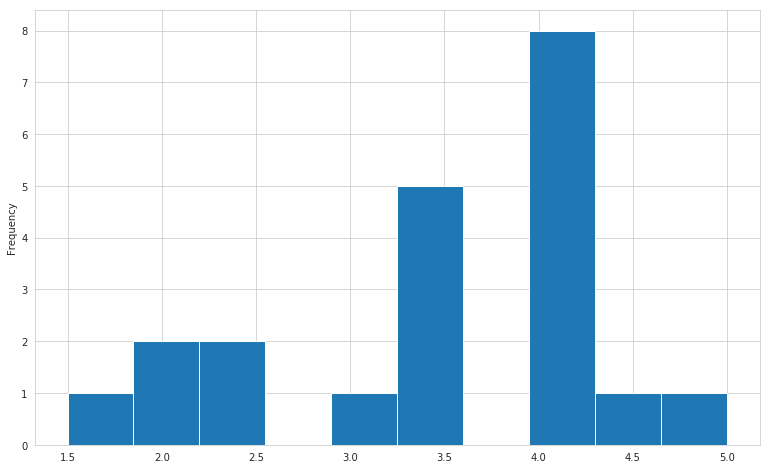

count    21.000000
mean      3.452381
std       0.893095
min       1.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  2275    Re-Animator (1985)
Name: title, dtype: object


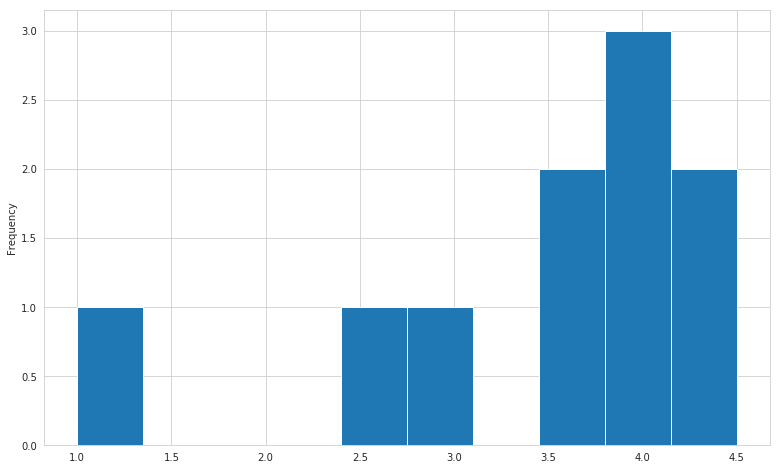

count    10.000000
mean      3.450000
std       1.065885
min       1.000000
25%       3.125000
50%       3.750000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


Movie:  216    I.Q. (1994)
Name: title, dtype: object


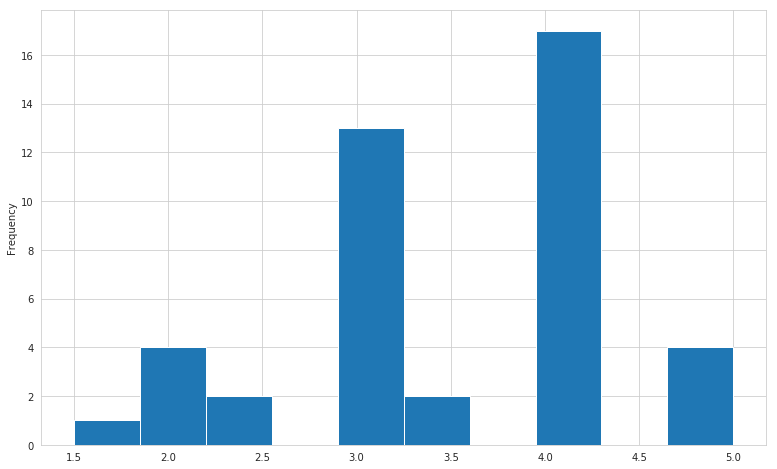

count    43.000000
mean      3.453488
std       0.864746
min       1.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  8237    Kick-Ass 2 (2013)
Name: title, dtype: object


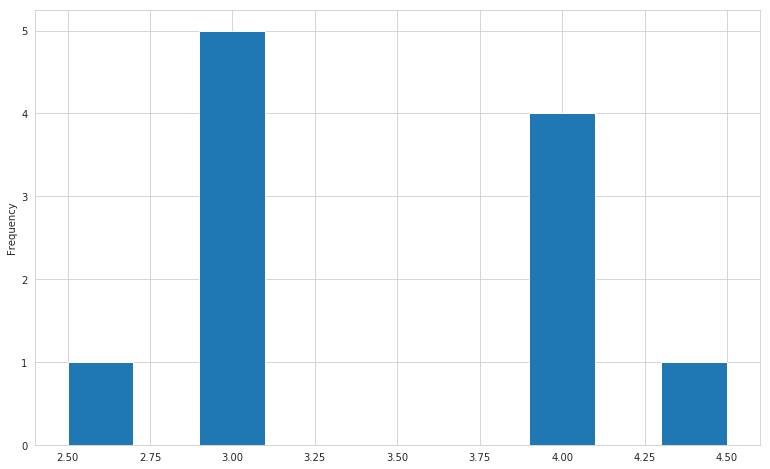

count    11.000000
mean      3.454545
std       0.650175
min       2.500000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


Movie:  4500    Pink Panther, The (1963)
Name: title, dtype: object


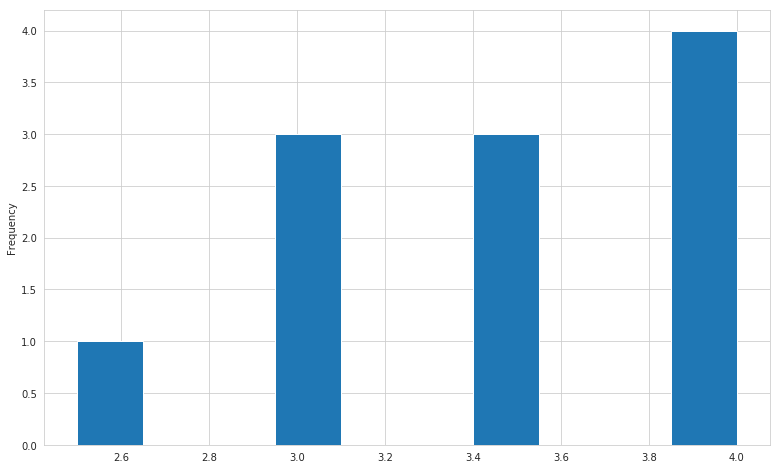

count    11.000000
mean      3.454545
std       0.522233
min       2.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.000000
Name: rating, dtype: float64


Movie:  92    Happy Gilmore (1996)
Name: title, dtype: object


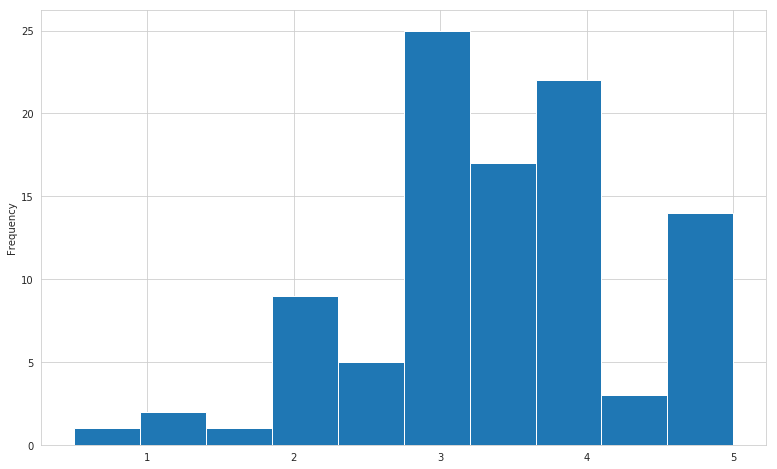

count    99.000000
mean      3.439394
std       0.993018
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  1788    Very Bad Things (1998)
Name: title, dtype: object


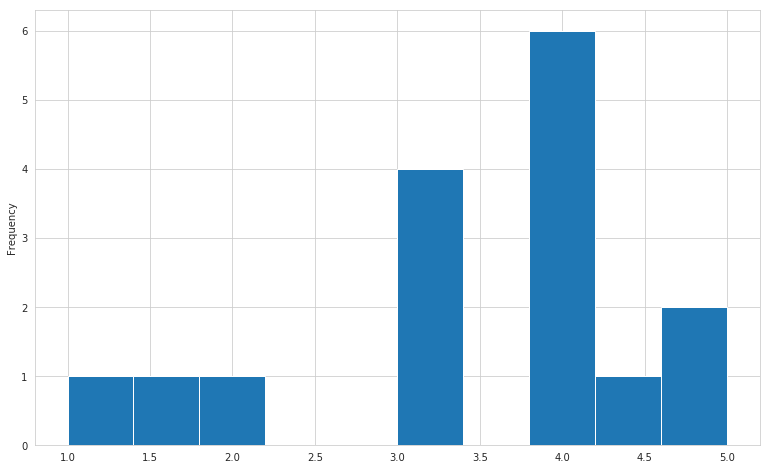

count    16.000000
mean      3.437500
std       1.167262
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  3434    UHF (1989)
Name: title, dtype: object


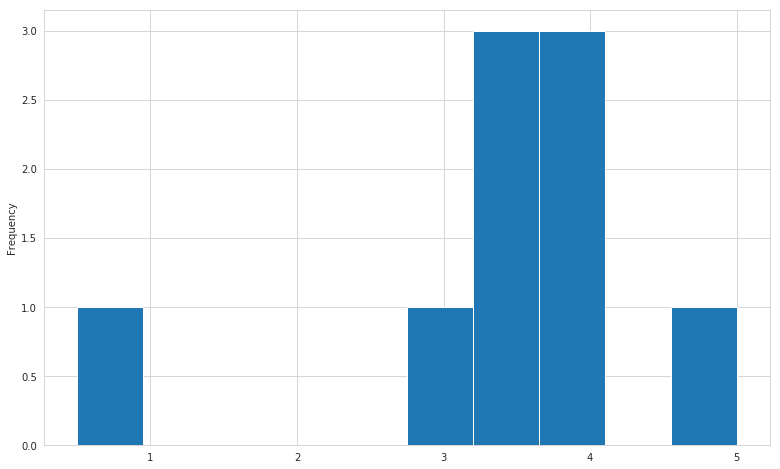

count    9.000000
mean     3.444444
std      1.236033
min      0.500000
25%      3.500000
50%      3.500000
75%      4.000000
max      5.000000
Name: rating, dtype: float64


Movie:  2961    Pay It Forward (2000)
Name: title, dtype: object


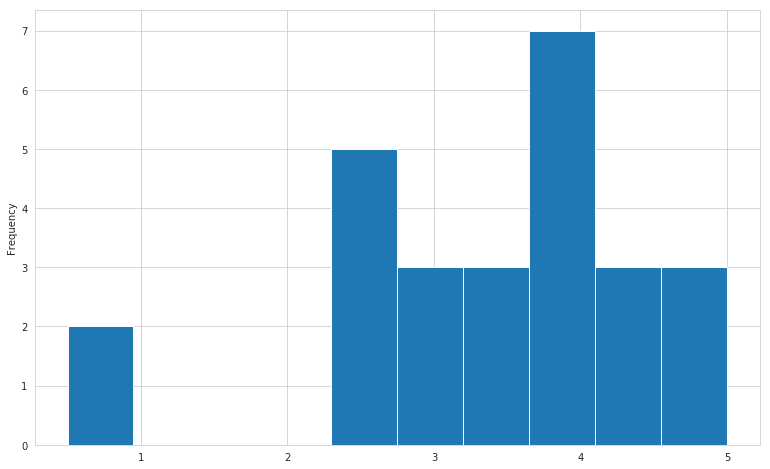

count    26.000000
mean      3.442308
std       1.185976
min       0.500000
25%       2.625000
50%       3.750000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  8287    Ender's Game (2013)
Name: title, dtype: object


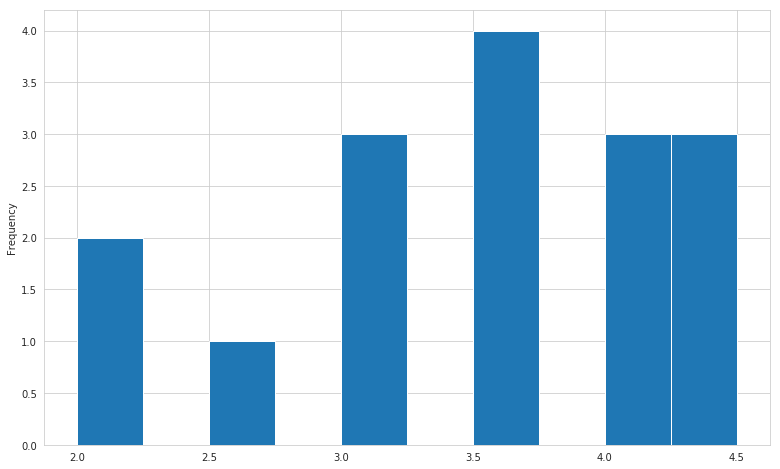

count    16.000000
mean      3.437500
std       0.813941
min       2.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


Movie:  2710    Spy Who Loved Me, The (1977)
Name: title, dtype: object


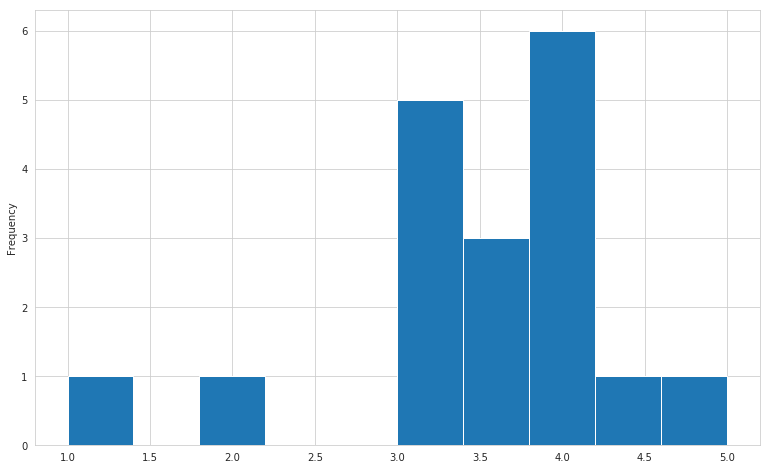

count    18.000000
mean      3.444444
std       0.921777
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  8860    Pitch Perfect 2 (2015)
Name: title, dtype: object


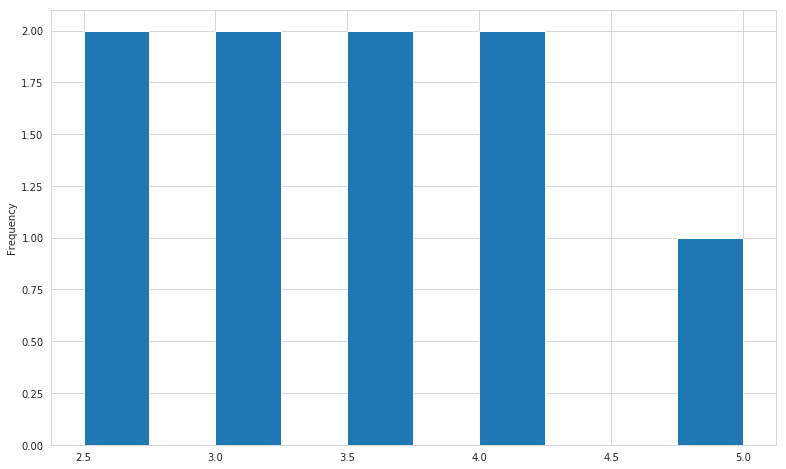

count    9.000000
mean     3.444444
std      0.807947
min      2.500000
25%      3.000000
50%      3.500000
75%      4.000000
max      5.000000
Name: rating, dtype: float64


Movie:  6075    Chronicles of Narnia: The Lion, the Witch and ...
Name: title, dtype: object


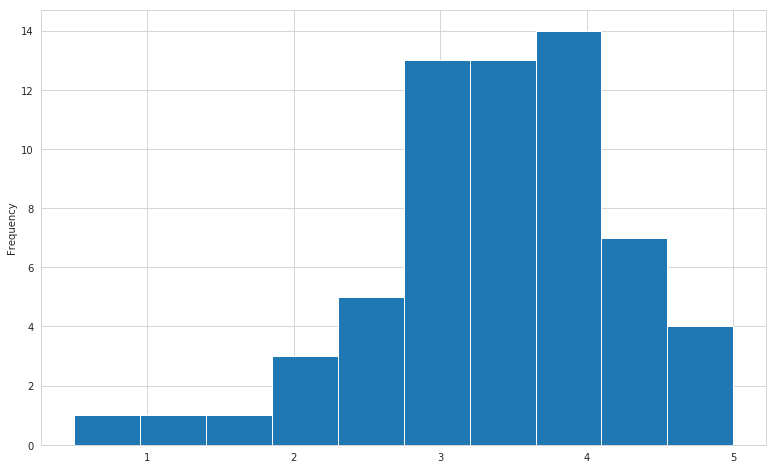

count    62.000000
mean      3.443548
std       0.936968
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  3991    Red Dragon (2002)
Name: title, dtype: object


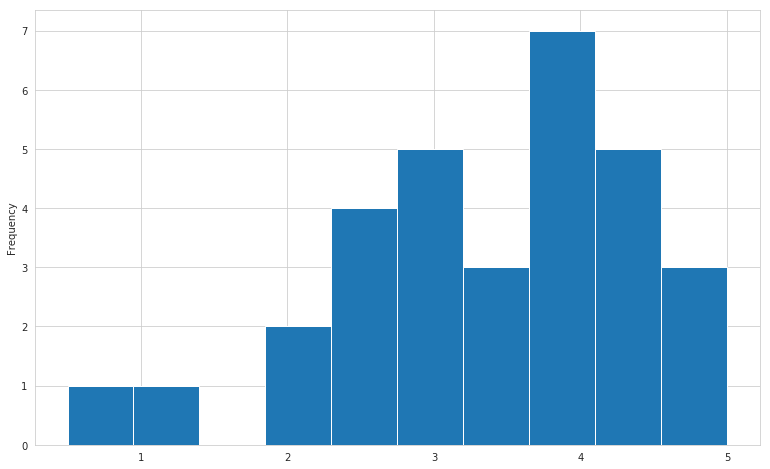

count    31.000000
mean      3.435484
std       1.130943
min       0.500000
25%       2.750000
50%       3.500000
75%       4.250000
max       5.000000
Name: rating, dtype: float64


Movie:  6760    Kung Fu Panda (2008)
Name: title, dtype: object


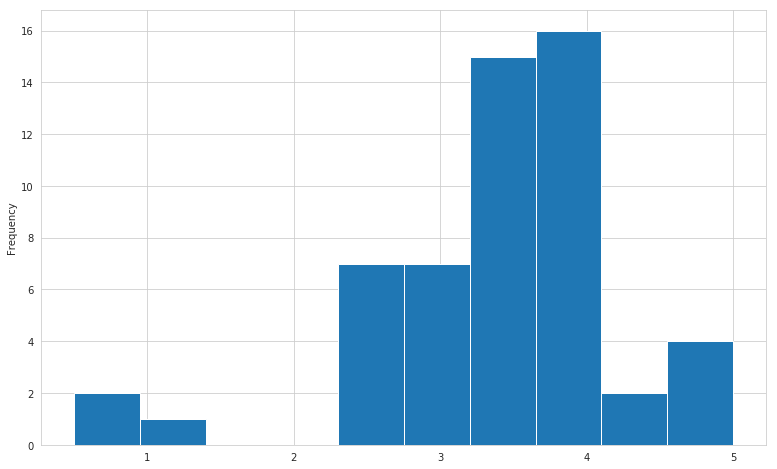

count    54.000000
mean      3.444444
std       0.950008
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  833    Crying Game, The (1992)
Name: title, dtype: object


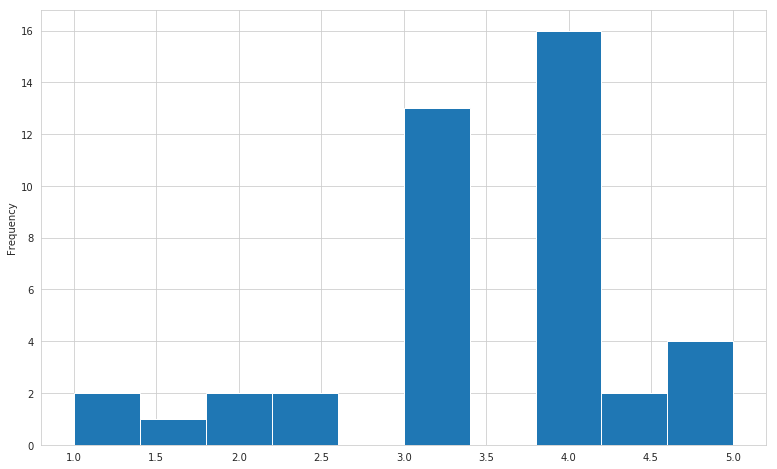

count    42.000000
mean      3.440476
std       1.001233
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  6883    Changeling (2008)
Name: title, dtype: object


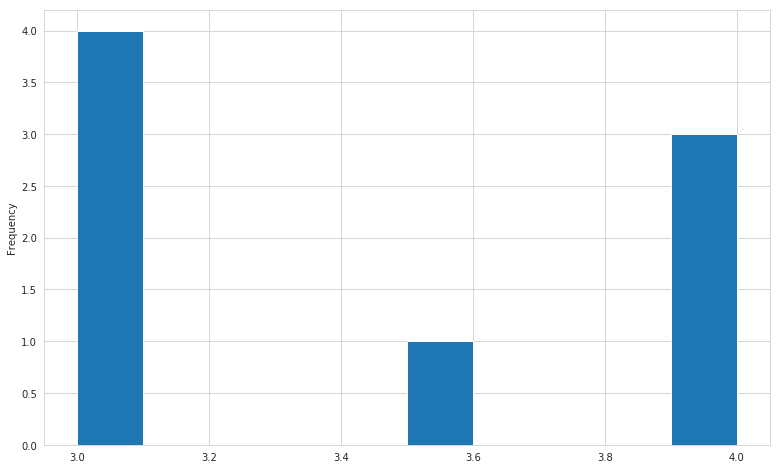

count    8.000000
mean     3.437500
std      0.495516
min      3.000000
25%      3.000000
50%      3.250000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


Movie:  7638    Horrible Bosses (2011)
Name: title, dtype: object


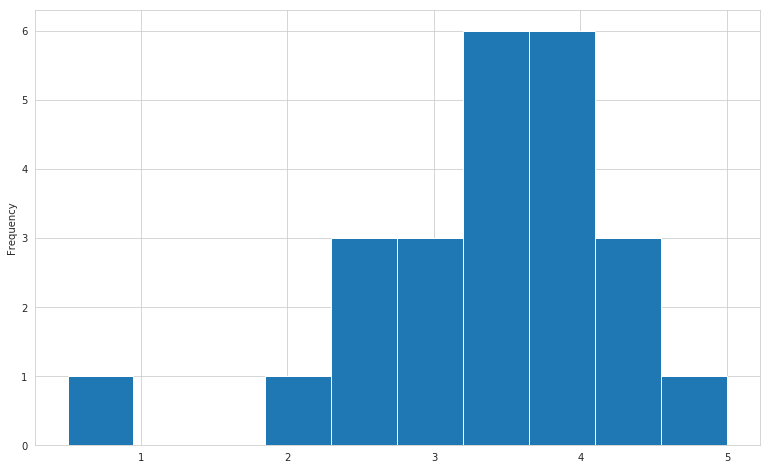

count    24.000000
mean      3.437500
std       0.970348
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  1750    Sid and Nancy (1986)
Name: title, dtype: object


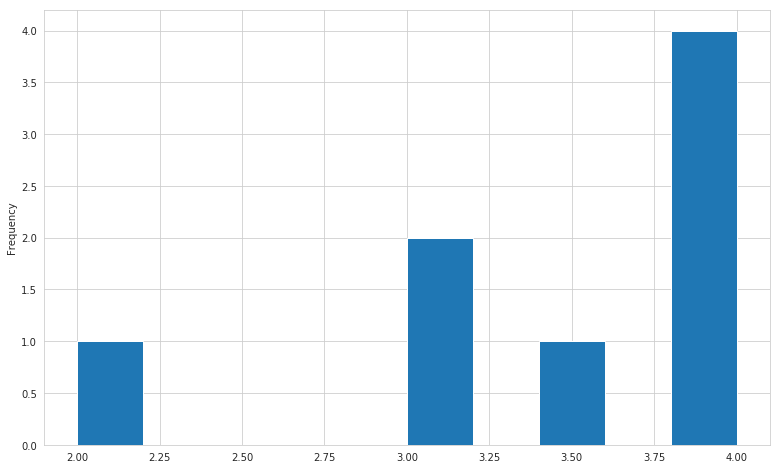

count    8.000000
mean     3.437500
std      0.728869
min      2.000000
25%      3.000000
50%      3.750000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


Movie:  7357    Winter's Bone (2010)
Name: title, dtype: object


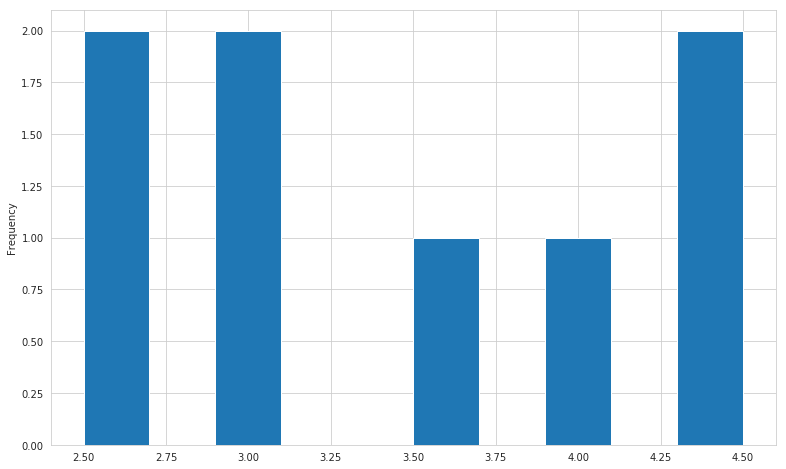

count    8.00000
mean     3.43750
std      0.82104
min      2.50000
25%      2.87500
50%      3.25000
75%      4.12500
max      4.50000
Name: rating, dtype: float64


Movie:  6026    Squid and the Whale, The (2005)
Name: title, dtype: object


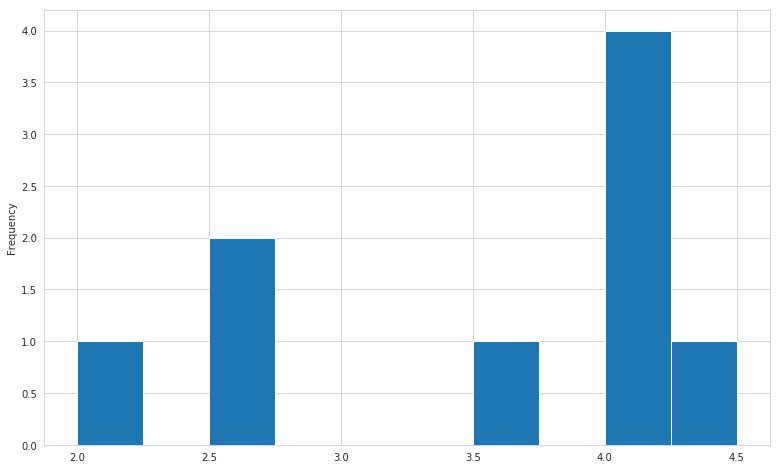

count    9.000000
mean     3.444444
std      0.881917
min      2.000000
25%      2.500000
50%      4.000000
75%      4.000000
max      4.500000
Name: rating, dtype: float64


Movie:  9090    Bridge of Spies (2015)
Name: title, dtype: object


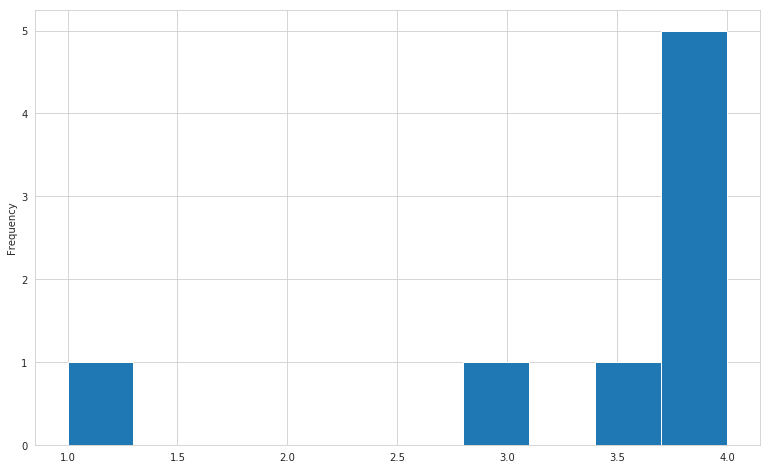

count    8.000000
mean     3.437500
std      1.050085
min      1.000000
25%      3.375000
50%      4.000000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


Movie:  7767    The Hunger Games (2012)
Name: title, dtype: object


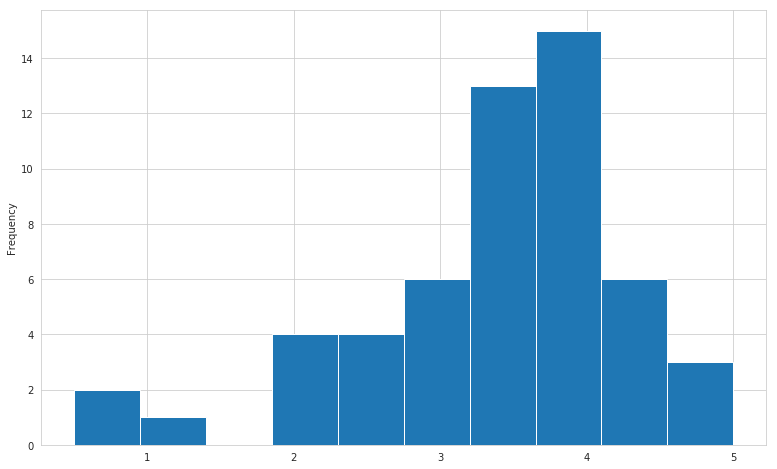

count    54.000000
mean      3.435185
std       1.018908
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  6488    Pirates of the Caribbean: At World's End (2007)
Name: title, dtype: object


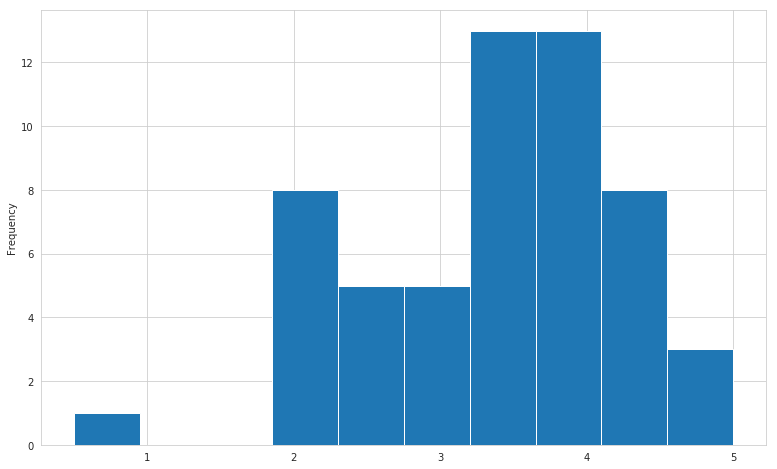

count    56.000000
mean      3.437500
std       0.963245
min       0.500000
25%       2.875000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  4498    Tremors (1990)
Name: title, dtype: object


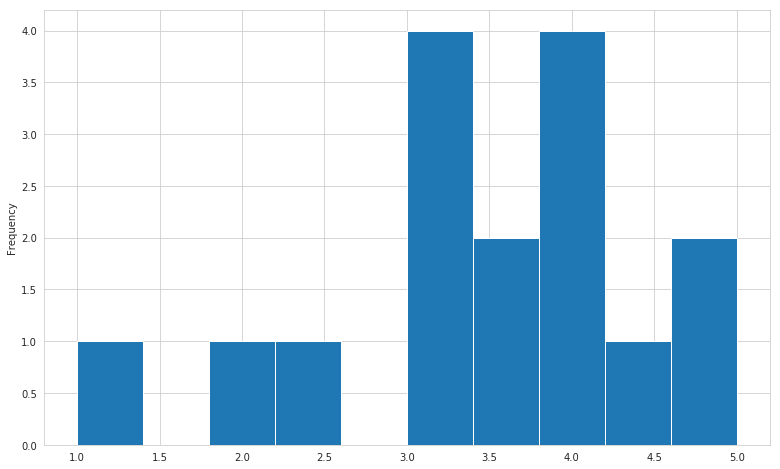

count    16.000000
mean      3.437500
std       1.062623
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  6356    Tenacious D in The Pick of Destiny (2006)
Name: title, dtype: object


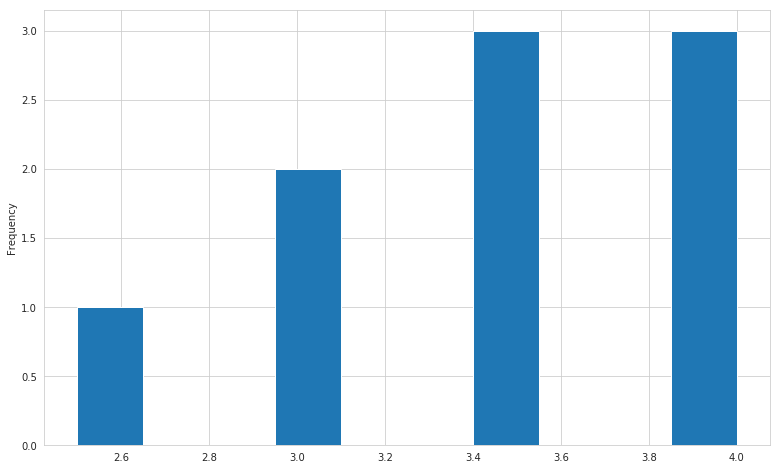

count    9.000000
mean     3.444444
std      0.527046
min      2.500000
25%      3.000000
50%      3.500000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


Movie:  4784    Naked Lunch (1991)
Name: title, dtype: object


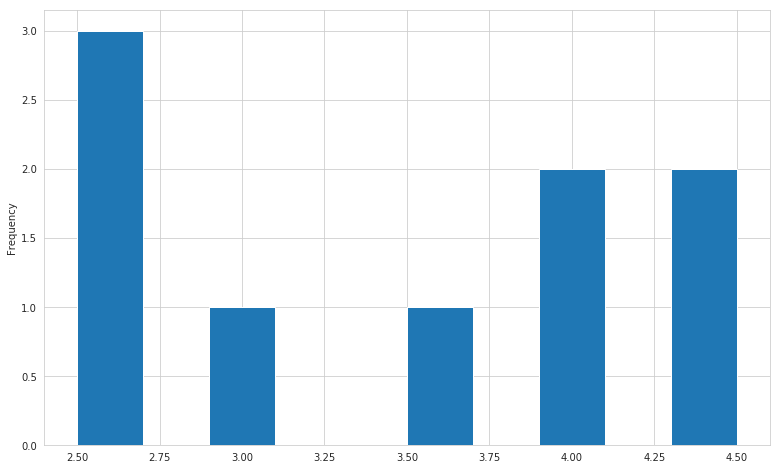

count    9.000000
mean     3.444444
std      0.845741
min      2.500000
25%      2.500000
50%      3.500000
75%      4.000000
max      4.500000
Name: rating, dtype: float64


Movie:  770    Old Yeller (1957)
Name: title, dtype: object


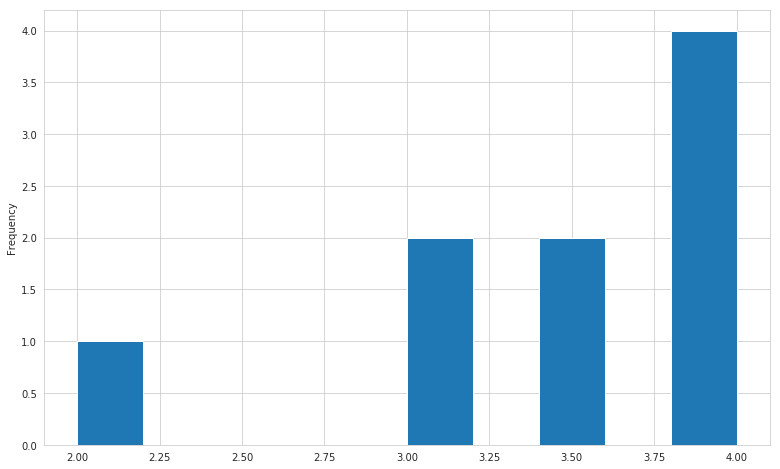

count    9.000000
mean     3.444444
std      0.682113
min      2.000000
25%      3.000000
50%      3.500000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


Movie:  2192    Risky Business (1983)
Name: title, dtype: object


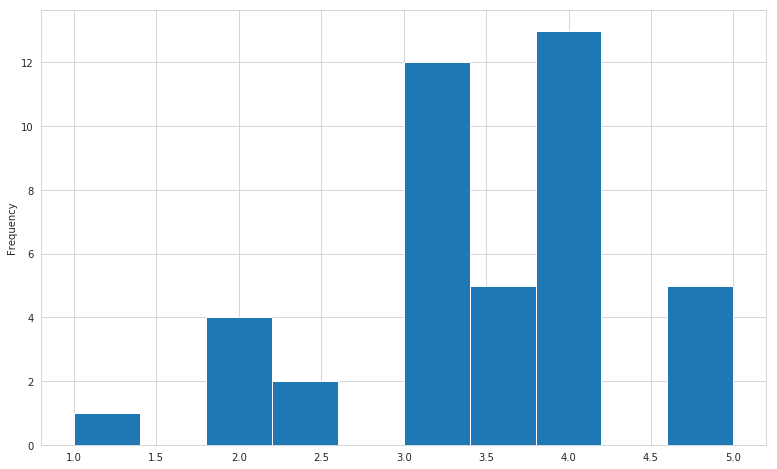

count    42.000000
mean      3.440476
std       0.918657
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  6073    Match Point (2005)
Name: title, dtype: object


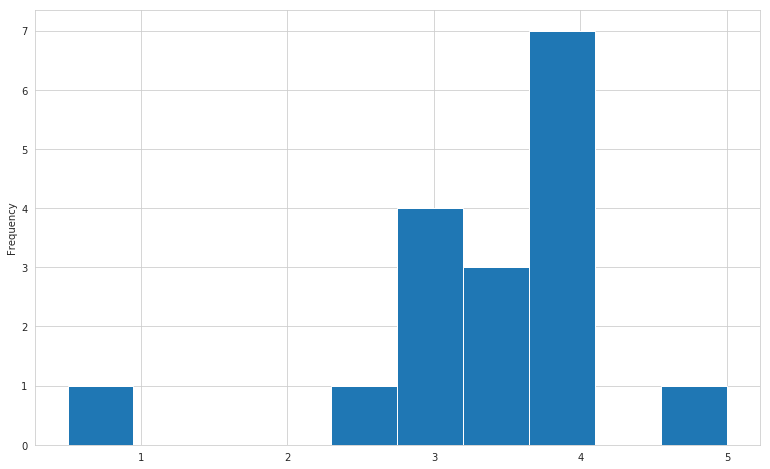

count    17.000000
mean      3.441176
std       0.966345
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  1391    X-Files: Fight the Future, The (1998)
Name: title, dtype: object


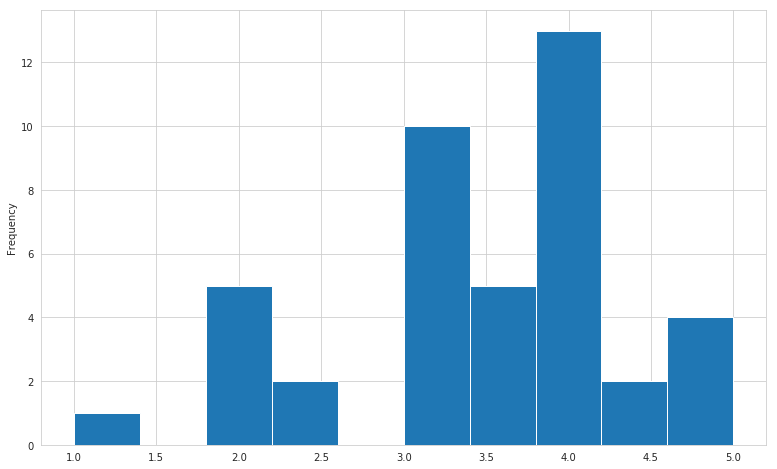

count    42.000000
mean      3.440476
std       0.938359
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  4616    Runaway Jury (2003)
Name: title, dtype: object


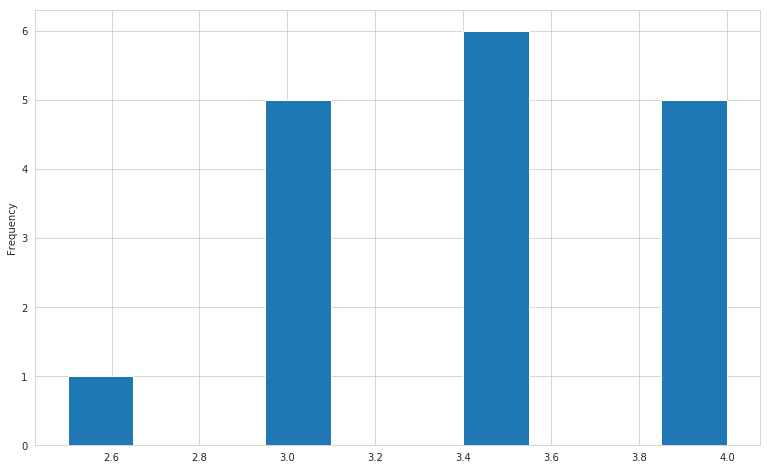

count    17.000000
mean      3.441176
std       0.463760
min       2.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.000000
Name: rating, dtype: float64


Movie:  3699    Sandlot, The (1993)
Name: title, dtype: object


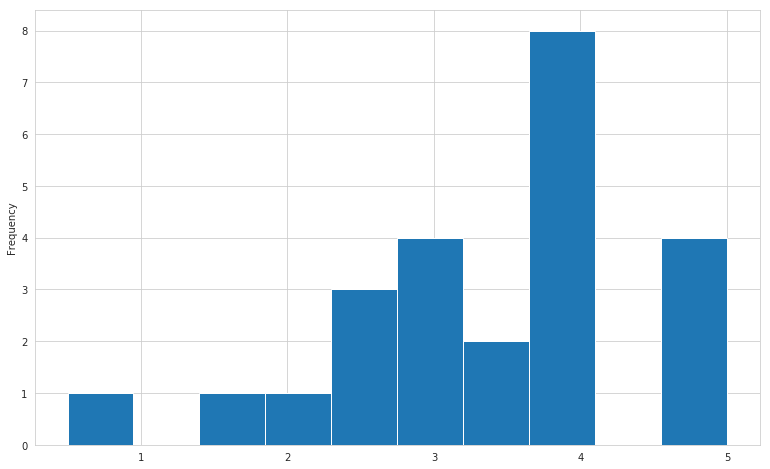

count    24.000000
mean      3.437500
std       1.145051
min       0.500000
25%       2.875000
50%       3.750000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  352    In the Mouth of Madness (1995)
Name: title, dtype: object


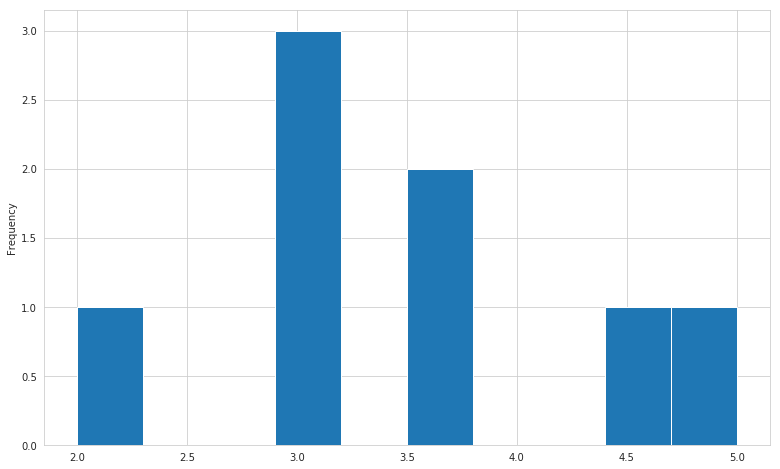

count    8.000000
mean     3.437500
std      0.942546
min      2.000000
25%      3.000000
50%      3.250000
75%      3.750000
max      5.000000
Name: rating, dtype: float64


Movie:  6879    Futurama: Bender's Game (2008)
Name: title, dtype: object


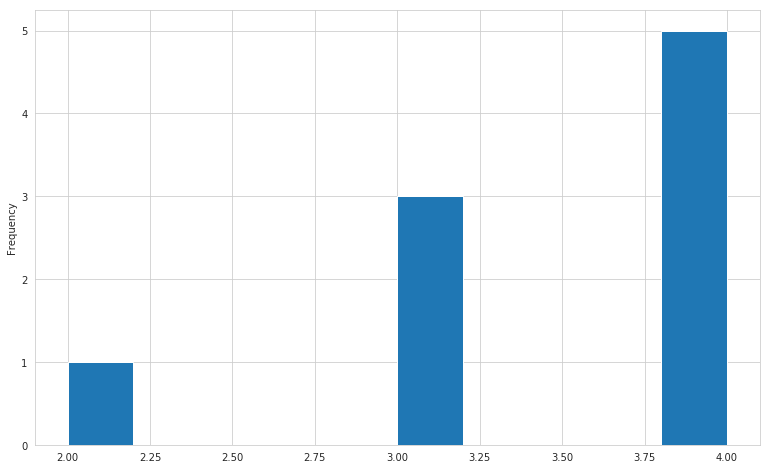

count    9.000000
mean     3.444444
std      0.726483
min      2.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


Movie:  7957    Campaign, The (2012)
Name: title, dtype: object


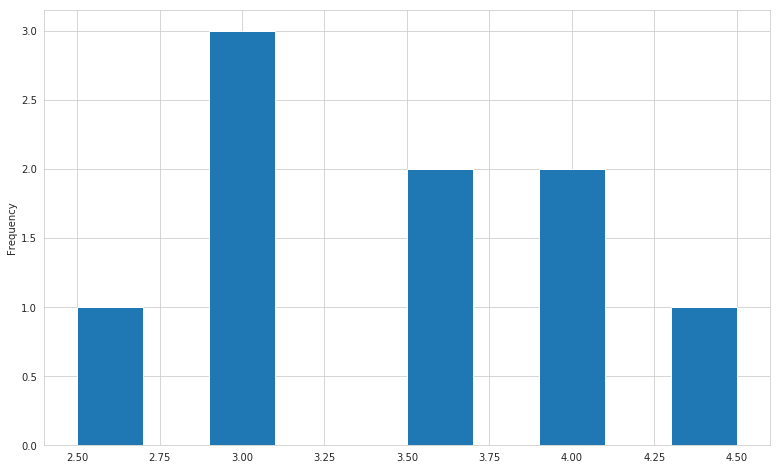

count    9.000000
mean     3.444444
std      0.634648
min      2.500000
25%      3.000000
50%      3.500000
75%      4.000000
max      4.500000
Name: rating, dtype: float64


Movie:  5895    Unleashed (Danny the Dog) (2005)
Name: title, dtype: object


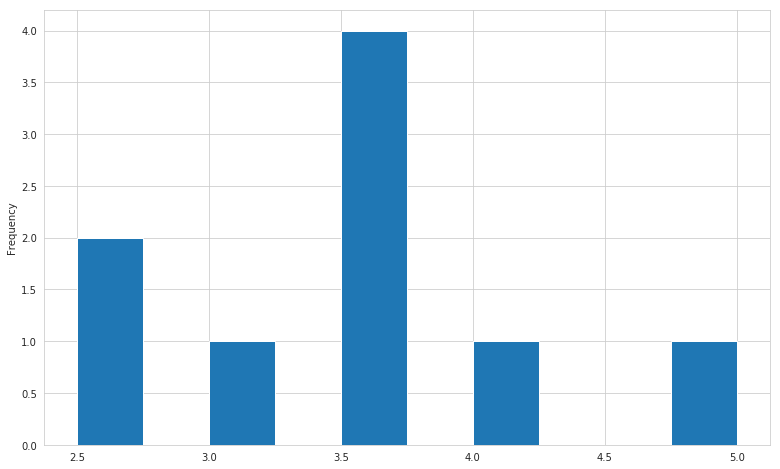

count    9.000000
mean     3.444444
std      0.768295
min      2.500000
25%      3.000000
50%      3.500000
75%      3.500000
max      5.000000
Name: rating, dtype: float64


Movie:  2459    Bad Lieutenant (1992)
Name: title, dtype: object


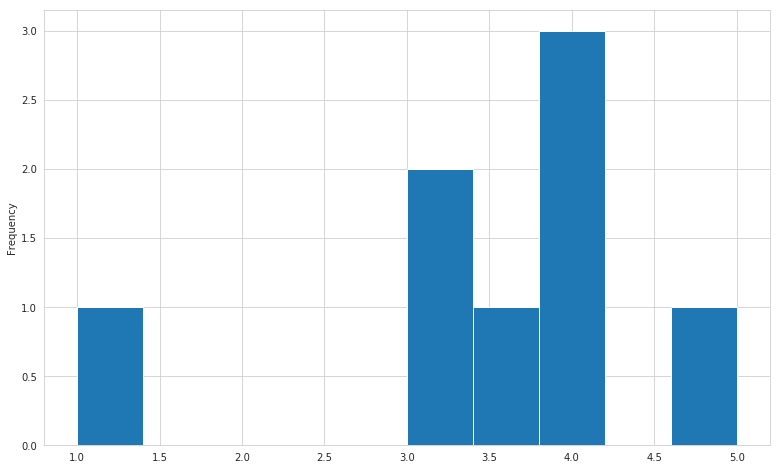

count    8.000000
mean     3.437500
std      1.178301
min      1.000000
25%      3.000000
50%      3.750000
75%      4.000000
max      5.000000
Name: rating, dtype: float64


Movie:  6696    Horton Hears a Who! (2008)
Name: title, dtype: object


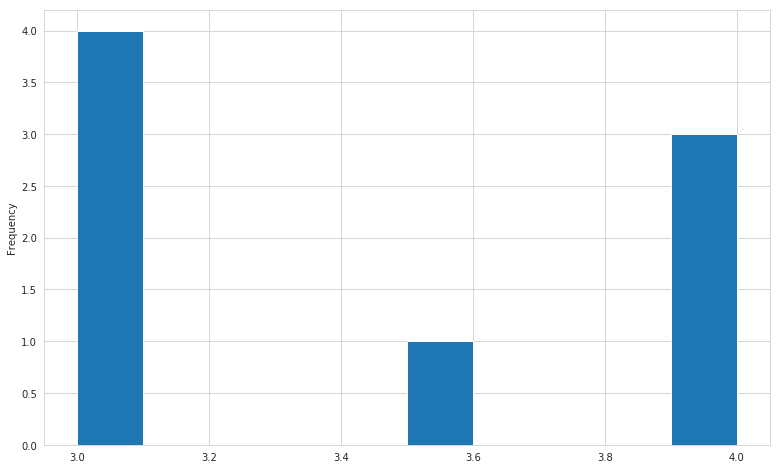

count    8.000000
mean     3.437500
std      0.495516
min      3.000000
25%      3.000000
50%      3.250000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


Movie:  2632    Mystery Train (1989)
Name: title, dtype: object


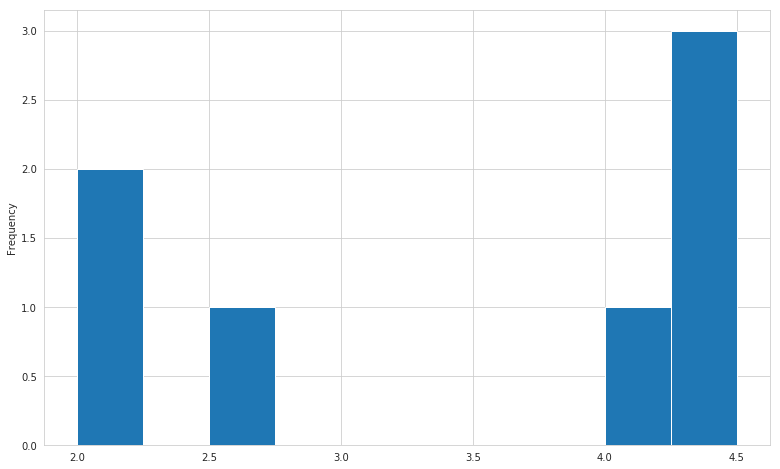

count    7.000000
mean     3.428571
std      1.205148
min      2.000000
25%      2.250000
50%      4.000000
75%      4.500000
max      4.500000
Name: rating, dtype: float64


Movie:  505    Ghost (1990)
Name: title, dtype: object


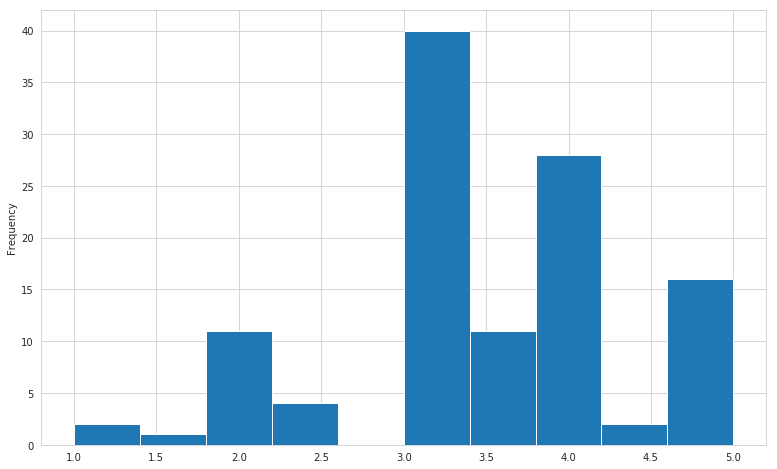

count    115.000000
mean       3.434783
std        0.935465
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


Movie:  6586    Darjeeling Limited, The (2007)
Name: title, dtype: object


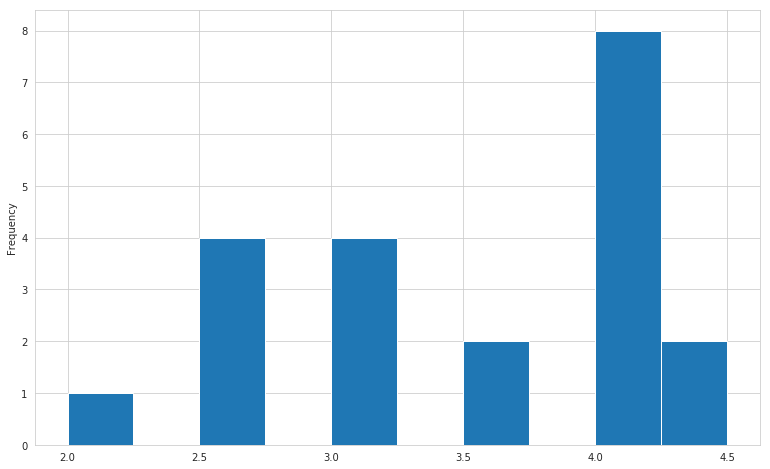

count    21.000000
mean      3.428571
std       0.746420
min       2.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


Movie:  1667    Broadcast News (1987)
Name: title, dtype: object


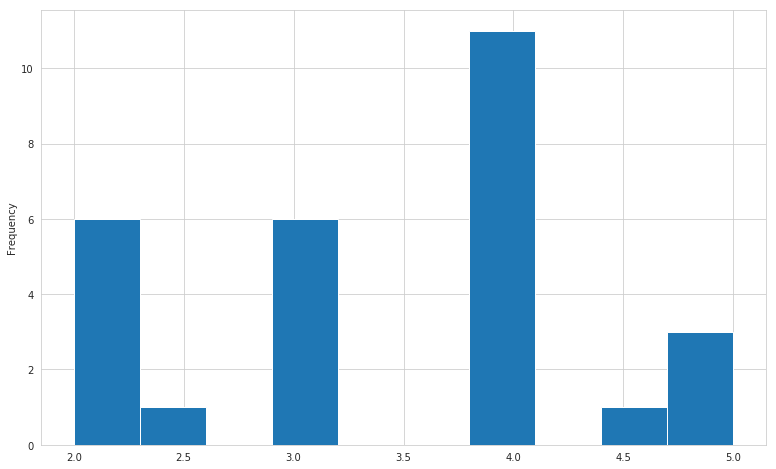

count    28.000000
mean      3.428571
std       0.988024
min       2.000000
25%       2.875000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


Movie:  171    To Wong Foo, Thanks for Everything! Julie Newm...
Name: title, dtype: object


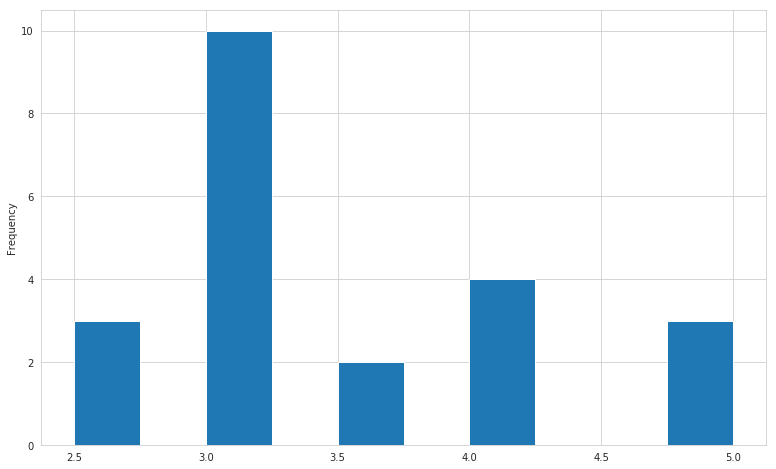

count    22.000000
mean      3.431818
std       0.791254
min       2.500000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


In [10]:
for ID in filtered_movies['movieId'].values:
#     display(Markdown('## Movie Id: ' + str(ID)))
#     filtered_movies.loc[int(ID), ['title']]
    movie_plot(ID)

## Challenge 3 by [Paulo Silveira](https://twitter.com/paulo_caelum)

Create the boxplot of the 10 films with the most votes (it is not with the highest average, it is with the most votes!). Not only plot, but also analyze and try to draw conclusions.

In [11]:
most_rated = movies.sort_values('number_of_ratings', ascending=False)[0:10]
top_10 = most_rated['movieId'].values
top_10 = list(top_10)

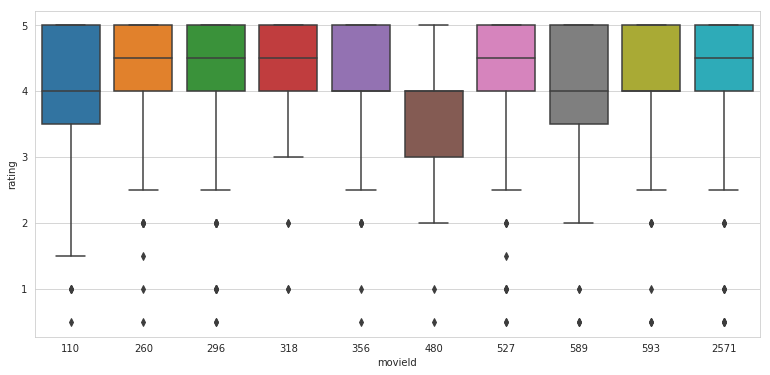

In [12]:
plt.figure(figsize=(13,6))

sns.boxplot(data=movies_ratings.query('movieId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]'), x='movieId', y='rating')
plt.show()

## Challenge 4 by [Guilherme Silveira](https://www.linkedin.com/in/guilhermeazevedosilveira/)

Configure the view of the boxplot generated by seaborn (last boxplot plotted in class). Configure the size and put the name of the movies in the thicks.

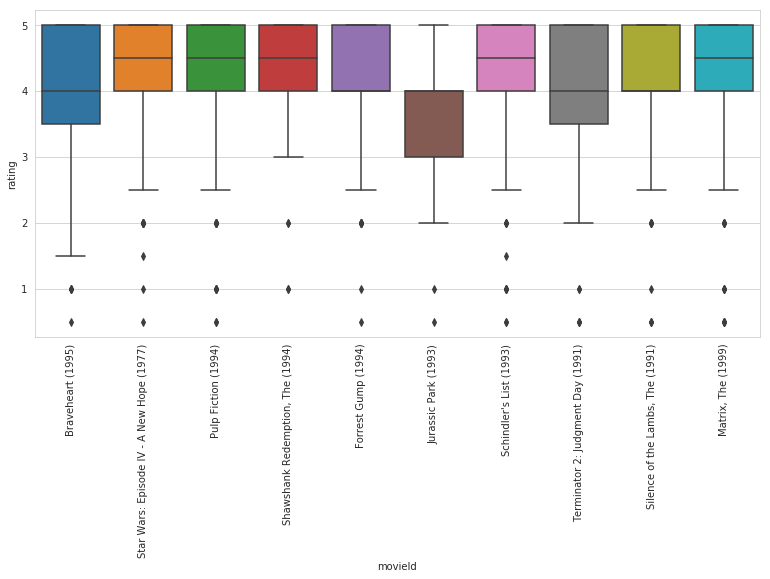

In [13]:
plt.figure(figsize=(13,6))

sns.boxplot(data=movies_ratings.query('movieId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]'), x='movieId', y='rating')
box_movies = movies.query('movieId in [356, 318, 296, 593, 2571, 260, 480, 110, 589, 527]')['title']

plt.xticks(np.arange(0,len(top_10)), box_movies, rotation=90)
plt.show()

## Challenge 5 by [Allan Spadini](https://twitter.com/allanspadini)

Calculate fashion, average and median of the films. Explore films with notes closer to 0.5, 3 and 5.

In [14]:
def movie_stats(average_rating):

    movie = movies.sort_values('number_of_ratings', ascending=False)[movies['average_rating'] == average_rating].iloc[0,:]
    ratings = movies_ratings[movies_ratings['movieId'] == movie['movieId']]['rating']

    print("\nMovie:", movie['title'])
    print("\nMode:", ratings.mode().values[0])
    print("\nMedian:", ratings.median())
    print("\nMean:", ratings.mean())
    print("\n")

In [15]:
movie_stats(4.5)
movie_stats(3)
movie_stats(0.8)


Movie: Five Easy Pieces (1970)

Mode: 5.0

Median: 4.75

Mean: 4.5



Movie: Home Alone (1990)

Mode: 3.0

Median: 3.0

Mean: 2.9956896551724137



Movie: Police Academy: Mission to Moscow (1994)

Mode: 0.5

Median: 0.5

Mean: 0.8




/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## Challenge 6 by [Thais André](https://twitter.com/thais_tandre)

Plot the boxplot and histogram next to each other (in the same figure or in different figures, but next to each other).

In [16]:
def movie_plot(n):
    find_id = 'movieId' + '==' + str(n)
    rating_movie = movies_ratings.query(find_id)["rating"]
    
    plt.figure(figsize = (13,8))
    plt.subplot(1, 2, 1)
    rating_movie.plot(kind='hist')
    print('\n')
    
    plt.subplot(1, 2, 2)
    rating_movie.plot.box(vert=False)
    plt.show()
    print(rating_movie.describe())

## Movie Id: 661

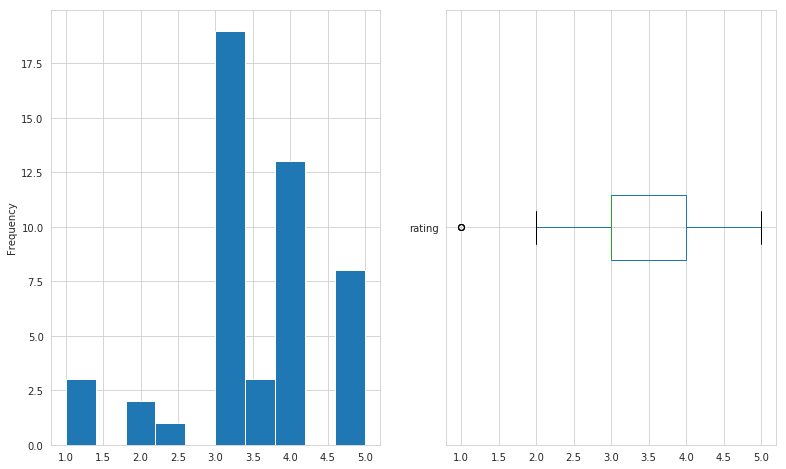

count    49.00000
mean      3.44898
std       1.02187
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       5.00000
Name: rating, dtype: float64


## Movie Id: 3753

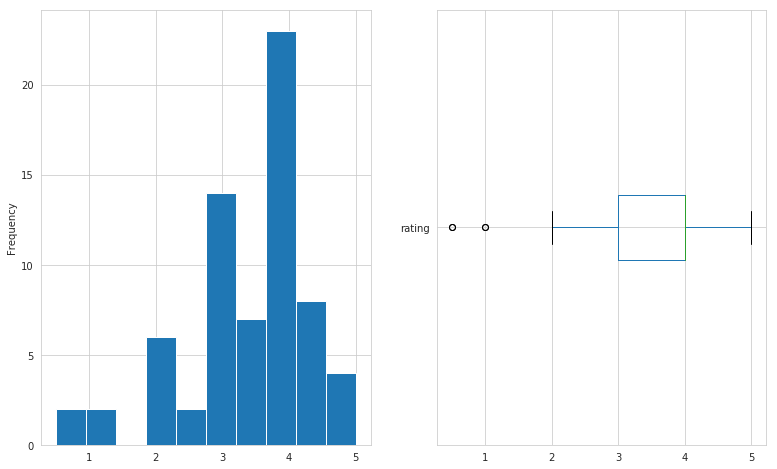

count    68.000000
mean      3.448529
std       1.037145
min       0.500000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 166461

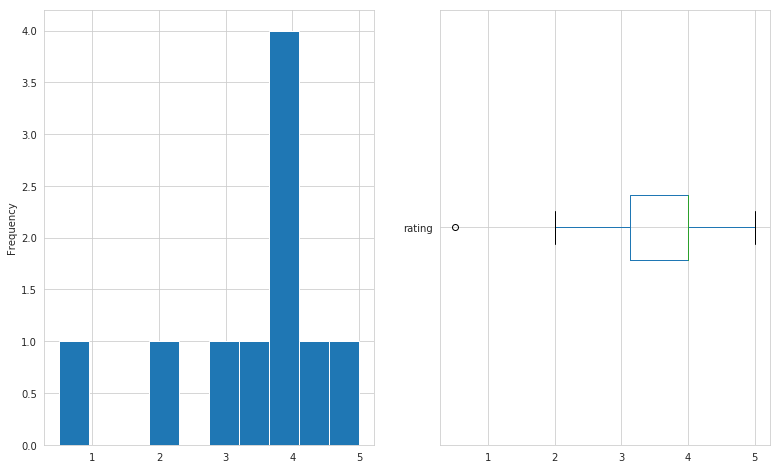

count    10.000000
mean      3.450000
std       1.321825
min       0.500000
25%       3.125000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 596

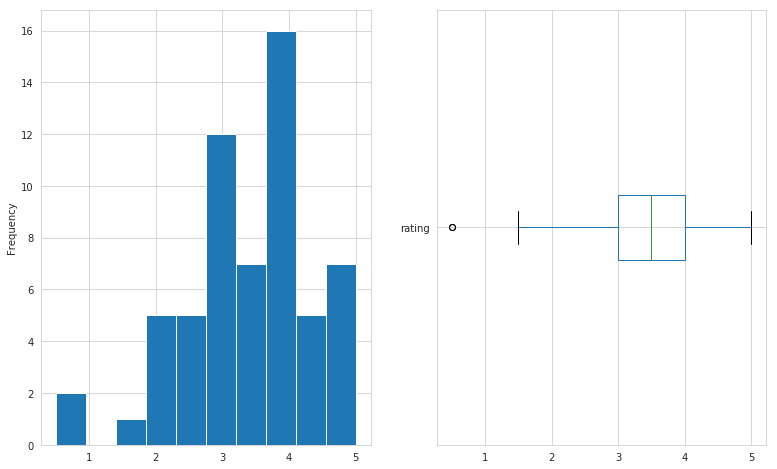

count    60.000000
mean      3.450000
std       1.056457
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 3397

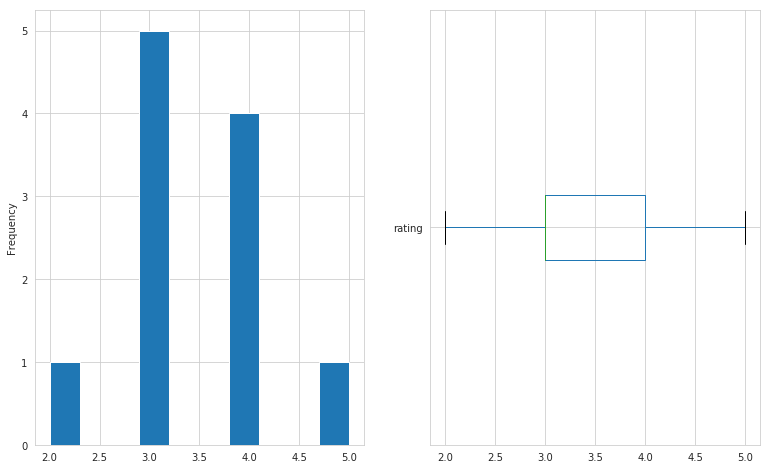

count    11.000000
mean      3.454545
std       0.820200
min       2.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 780

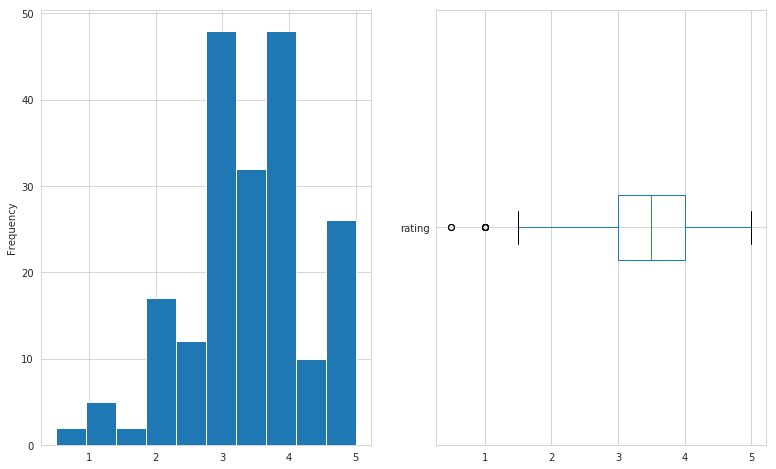

count    202.000000
mean       3.445545
std        0.996014
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


## Movie Id: 3536

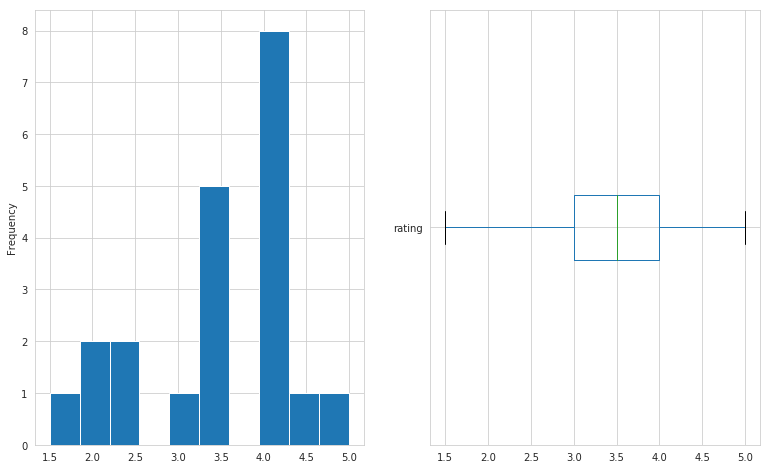

count    21.000000
mean      3.452381
std       0.893095
min       1.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 3018

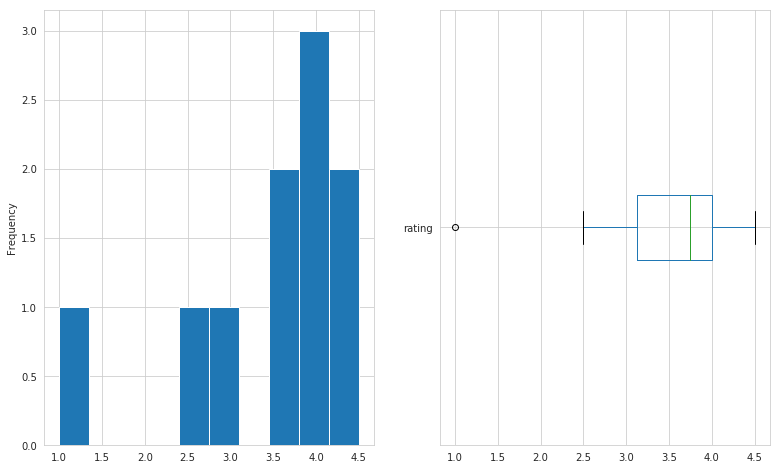

count    10.000000
mean      3.450000
std       1.065885
min       1.000000
25%       3.125000
50%       3.750000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


## Movie Id: 252

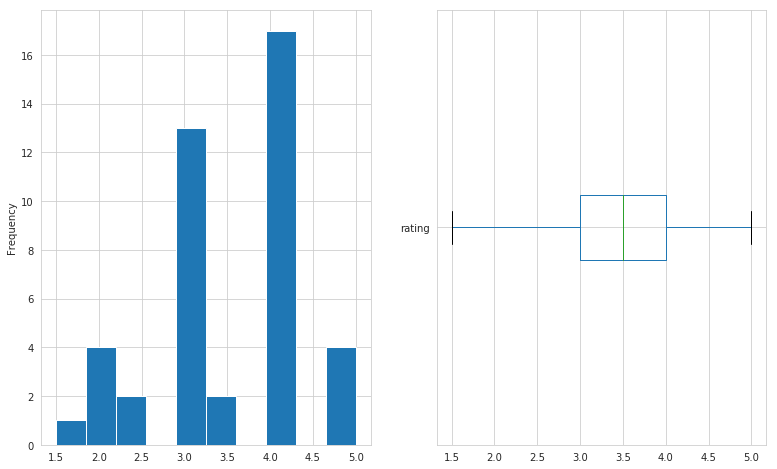

count    43.000000
mean      3.453488
std       0.864746
min       1.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 104241

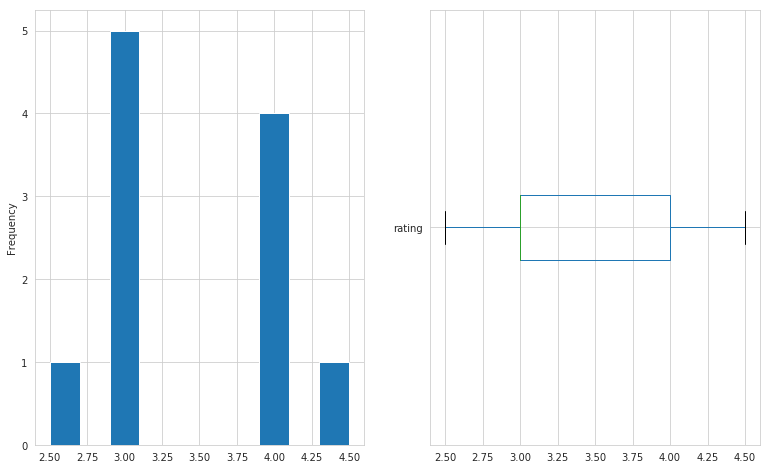

count    11.000000
mean      3.454545
std       0.650175
min       2.500000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


## Movie Id: 6662

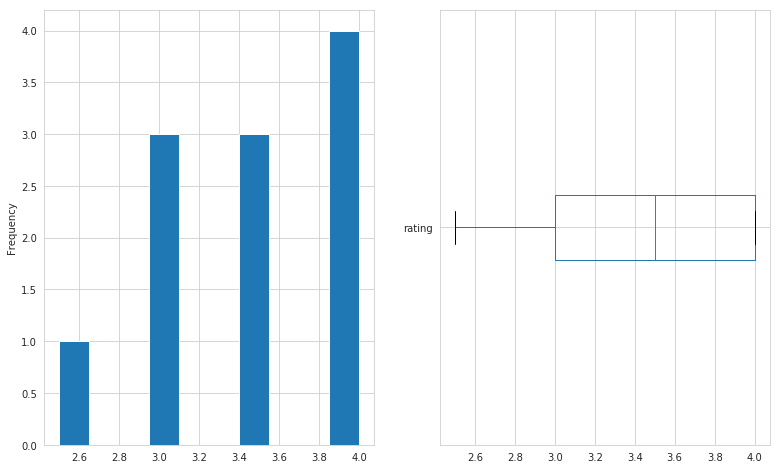

count    11.000000
mean      3.454545
std       0.522233
min       2.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.000000
Name: rating, dtype: float64


## Movie Id: 104

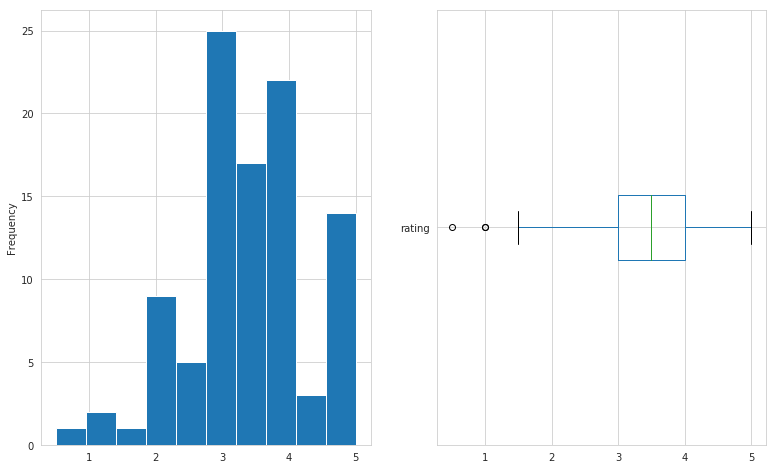

count    99.000000
mean      3.439394
std       0.993018
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 2387

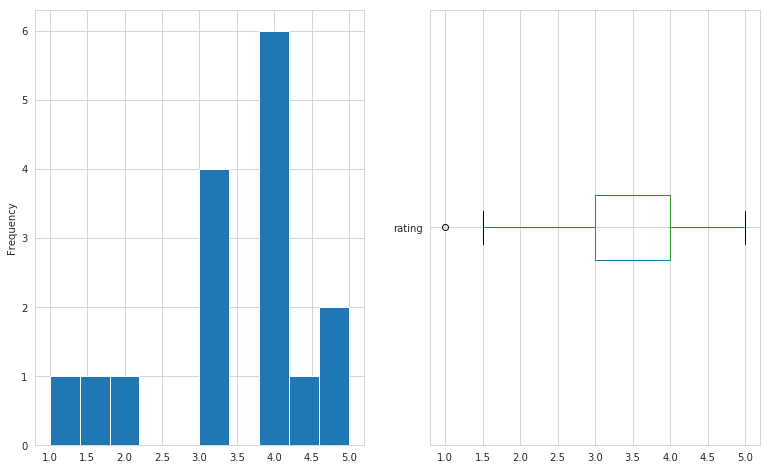

count    16.000000
mean      3.437500
std       1.167262
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 4678

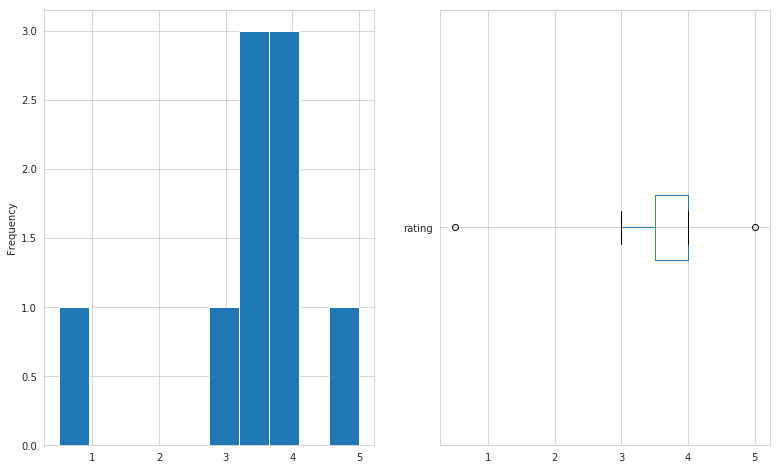

count    9.000000
mean     3.444444
std      1.236033
min      0.500000
25%      3.500000
50%      3.500000
75%      4.000000
max      5.000000
Name: rating, dtype: float64


## Movie Id: 3969

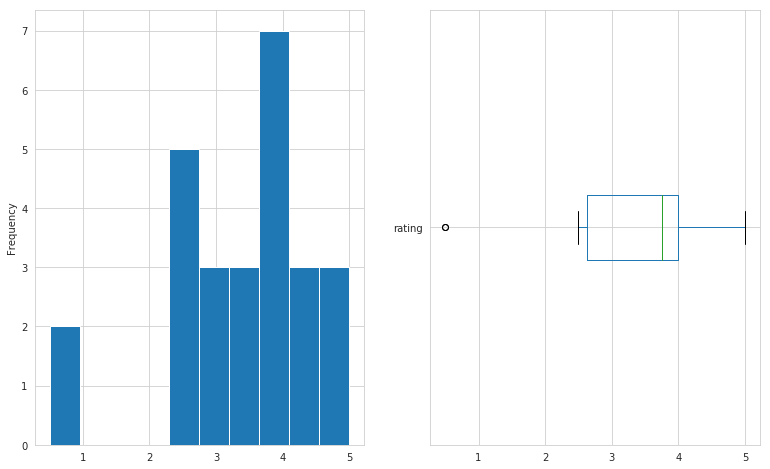

count    26.000000
mean      3.442308
std       1.185976
min       0.500000
25%       2.625000
50%       3.750000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 106002

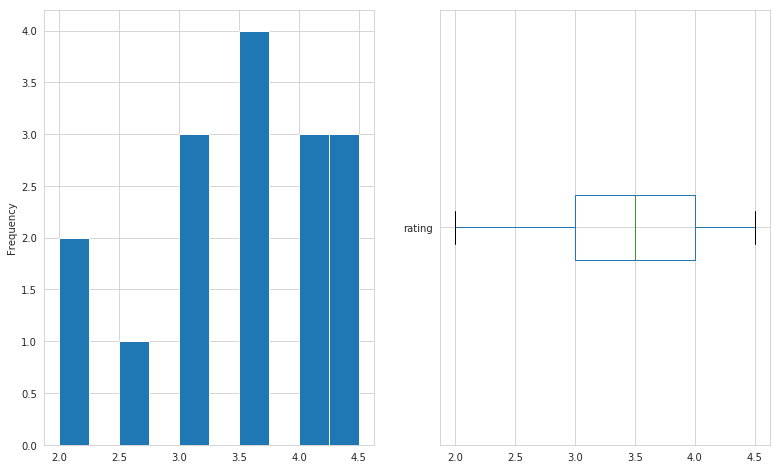

count    16.000000
mean      3.437500
std       0.813941
min       2.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


## Movie Id: 3635

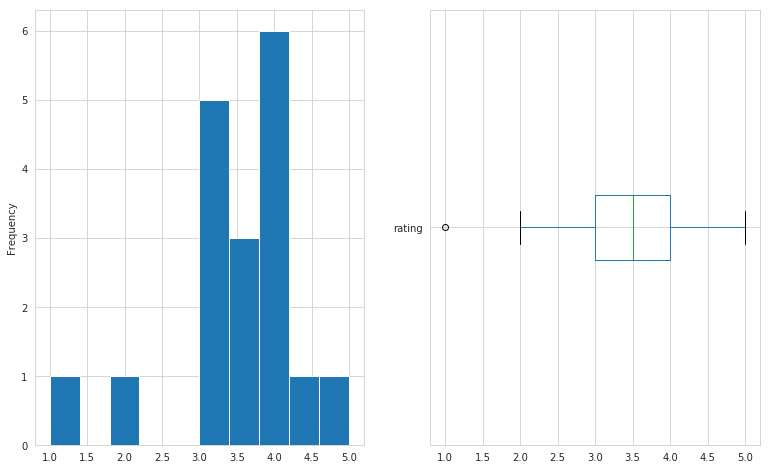

count    18.000000
mean      3.444444
std       0.921777
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 133419

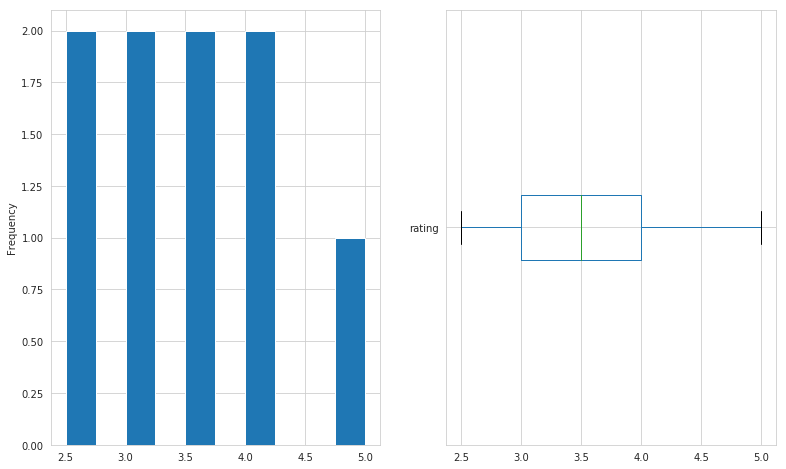

count    9.000000
mean     3.444444
std      0.807947
min      2.500000
25%      3.000000
50%      3.500000
75%      4.000000
max      5.000000
Name: rating, dtype: float64


## Movie Id: 41566

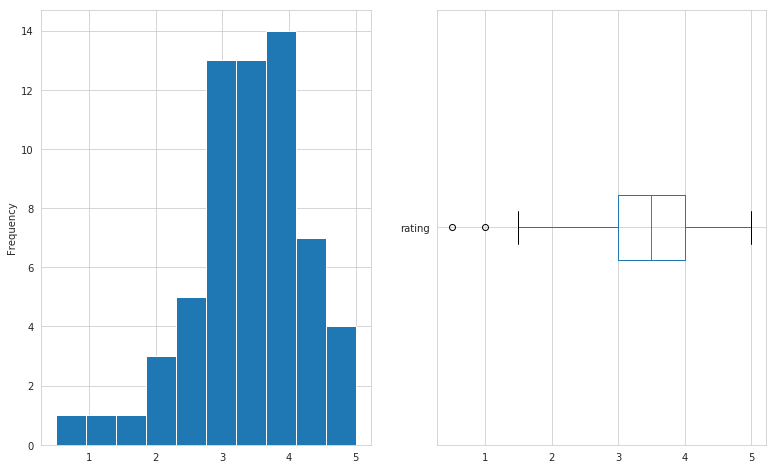

count    62.000000
mean      3.443548
std       0.936968
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 5630

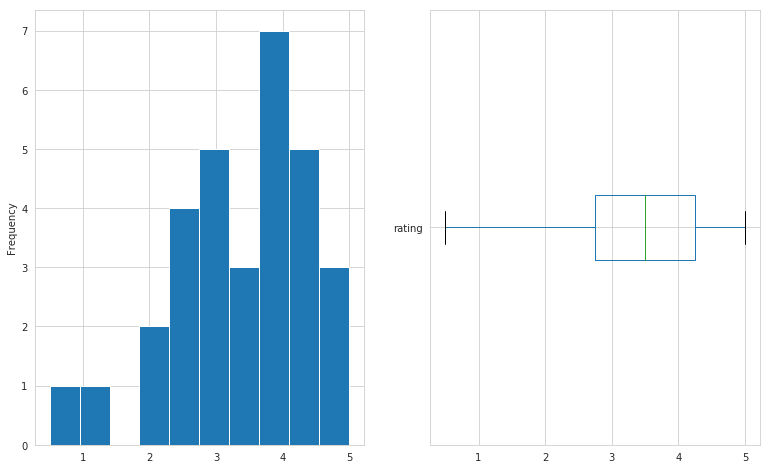

count    31.000000
mean      3.435484
std       1.130943
min       0.500000
25%       2.750000
50%       3.500000
75%       4.250000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 59784

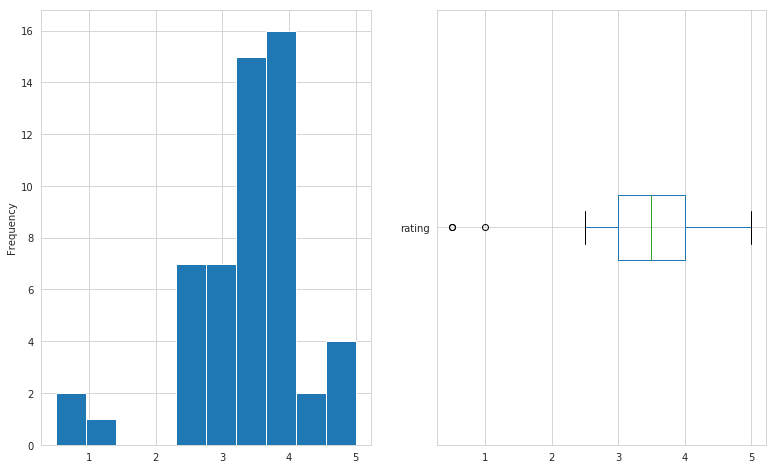

count    54.000000
mean      3.444444
std       0.950008
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 1094

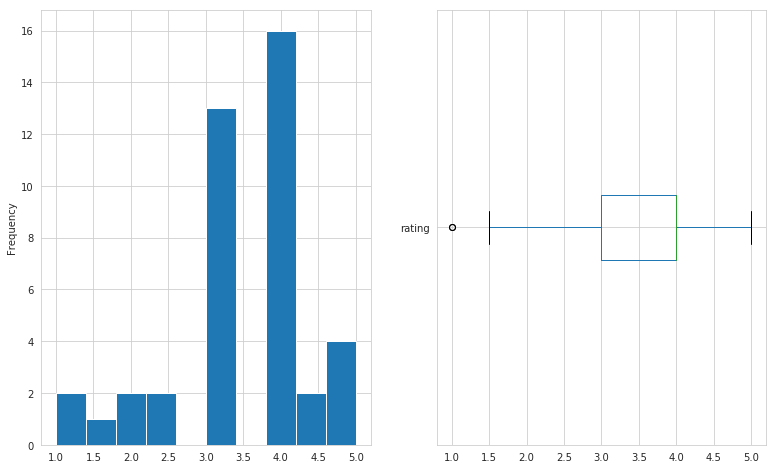

count    42.000000
mean      3.440476
std       1.001233
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 63062

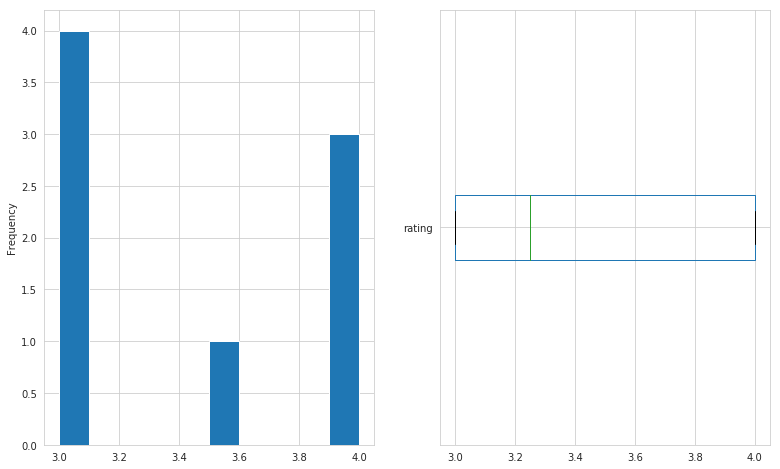

count    8.000000
mean     3.437500
std      0.495516
min      3.000000
25%      3.000000
50%      3.250000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


## Movie Id: 87869

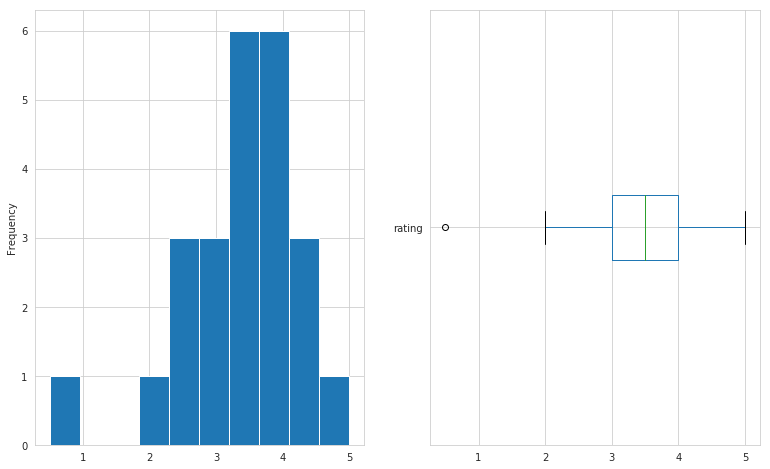

count    24.000000
mean      3.437500
std       0.970348
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 2348

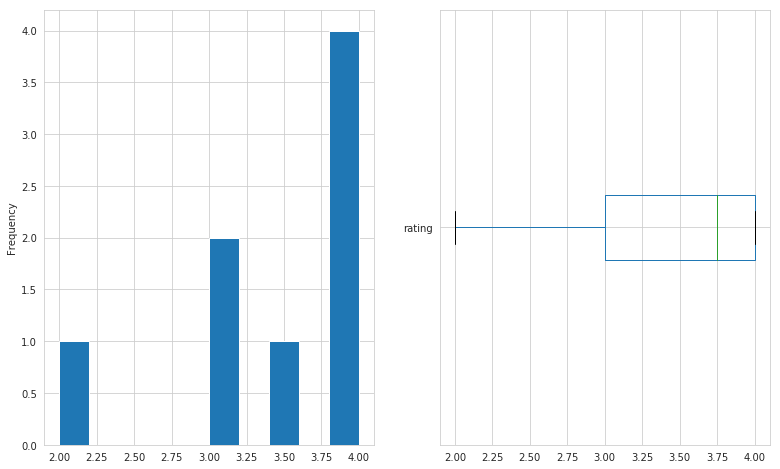

count    8.000000
mean     3.437500
std      0.728869
min      2.000000
25%      3.000000
50%      3.750000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


## Movie Id: 78574

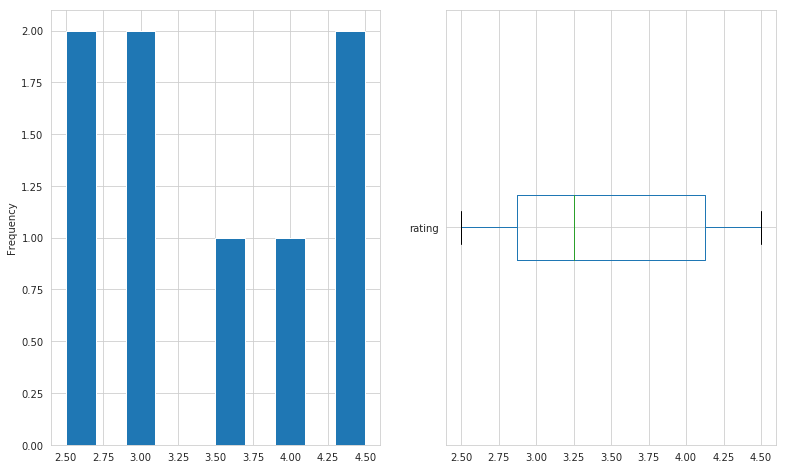

count    8.00000
mean     3.43750
std      0.82104
min      2.50000
25%      2.87500
50%      3.25000
75%      4.12500
max      4.50000
Name: rating, dtype: float64


## Movie Id: 38886

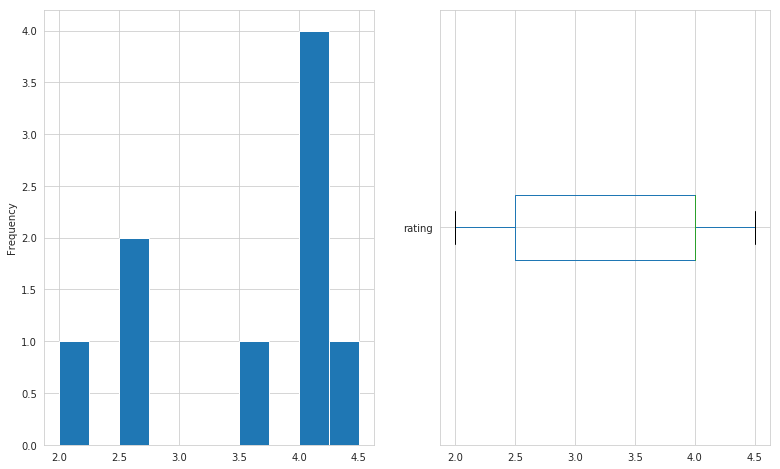

count    9.000000
mean     3.444444
std      0.881917
min      2.000000
25%      2.500000
50%      4.000000
75%      4.000000
max      4.500000
Name: rating, dtype: float64


## Movie Id: 143385

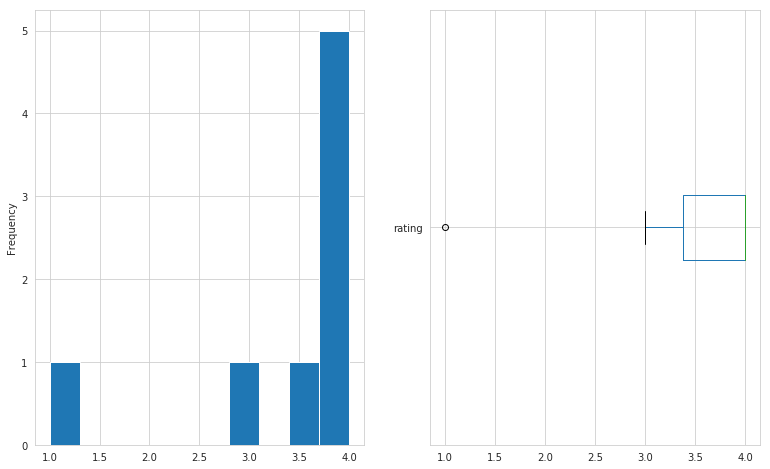

count    8.000000
mean     3.437500
std      1.050085
min      1.000000
25%      3.375000
50%      4.000000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


## Movie Id: 91500

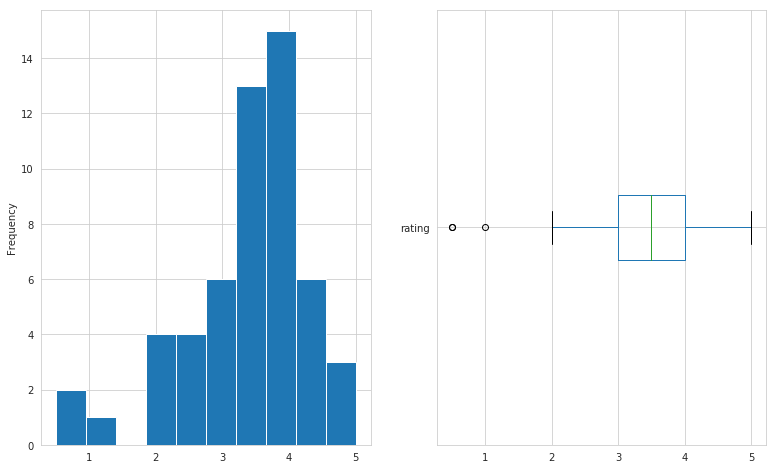

count    54.000000
mean      3.435185
std       1.018908
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 53125

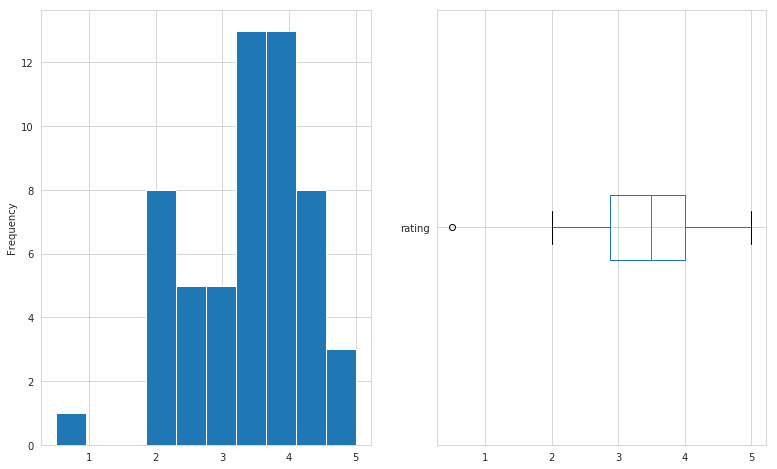

count    56.000000
mean      3.437500
std       0.963245
min       0.500000
25%       2.875000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 6659

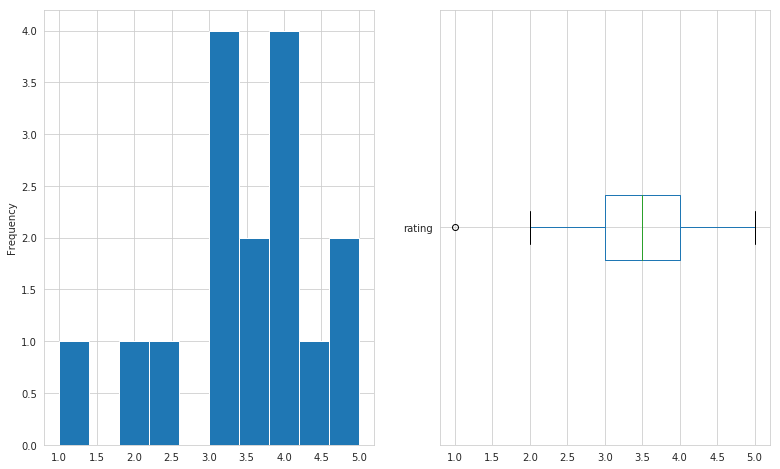

count    16.000000
mean      3.437500
std       1.062623
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 49396

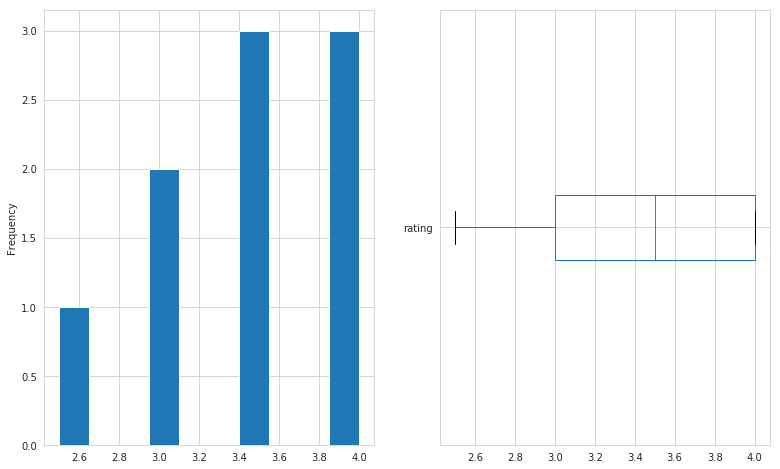

count    9.000000
mean     3.444444
std      0.527046
min      2.500000
25%      3.000000
50%      3.500000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


## Movie Id: 7123

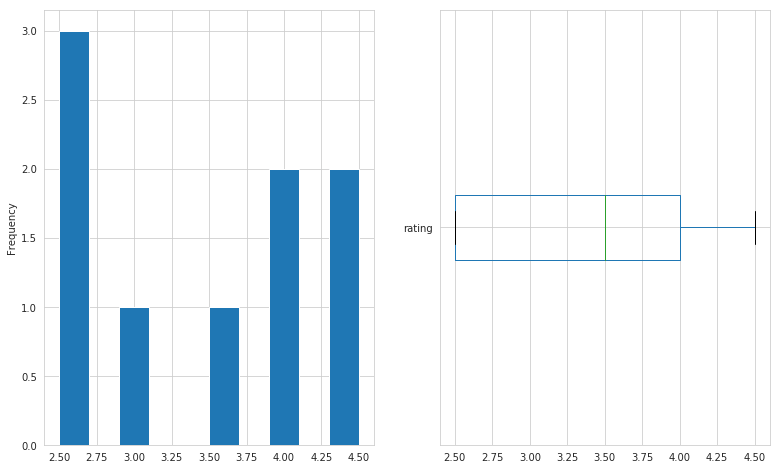

count    9.000000
mean     3.444444
std      0.845741
min      2.500000
25%      2.500000
50%      3.500000
75%      4.000000
max      4.500000
Name: rating, dtype: float64


## Movie Id: 1012

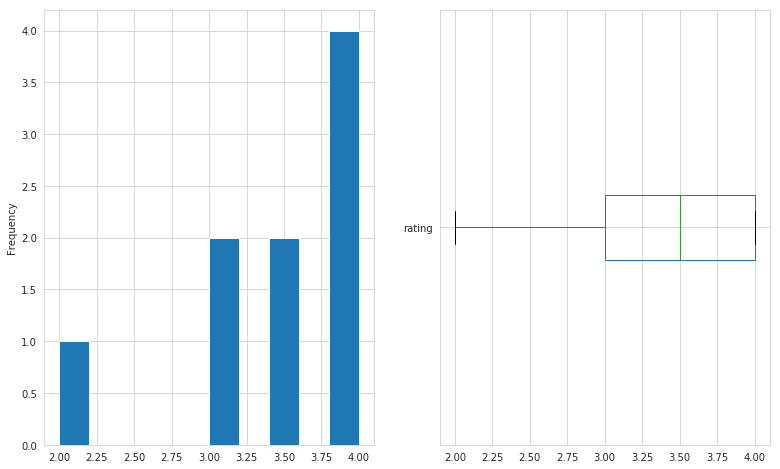

count    9.000000
mean     3.444444
std      0.682113
min      2.000000
25%      3.000000
50%      3.500000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


## Movie Id: 2915

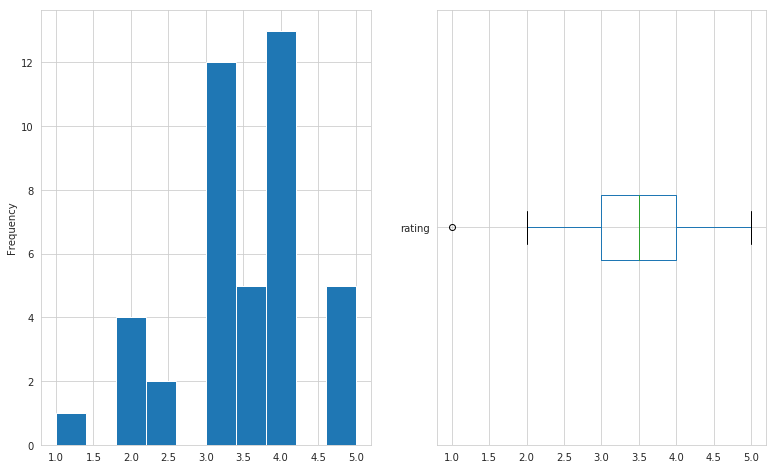

count    42.000000
mean      3.440476
std       0.918657
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 41285

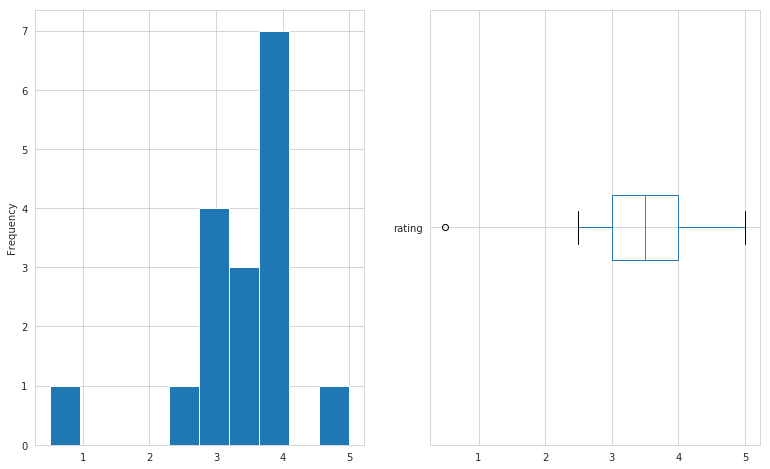

count    17.000000
mean      3.441176
std       0.966345
min       0.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 1909

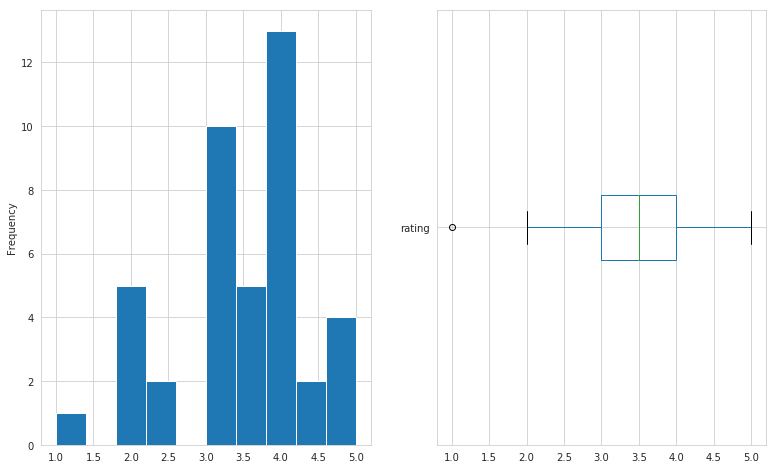

count    42.000000
mean      3.440476
std       0.938359
min       1.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 6879

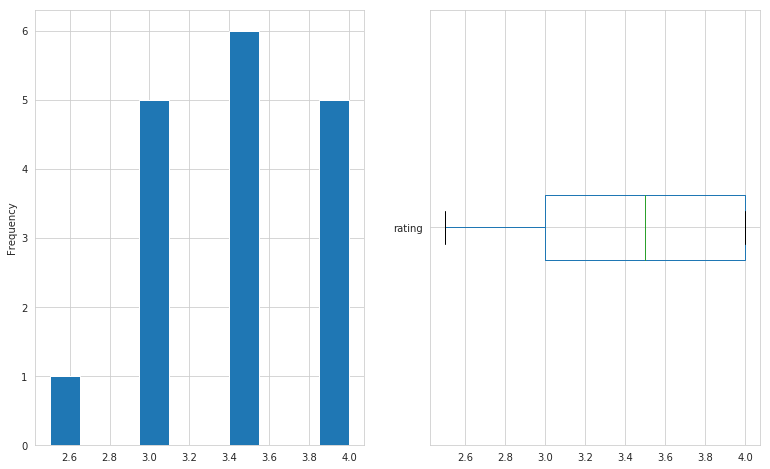

count    17.000000
mean      3.441176
std       0.463760
min       2.500000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.000000
Name: rating, dtype: float64


## Movie Id: 5103

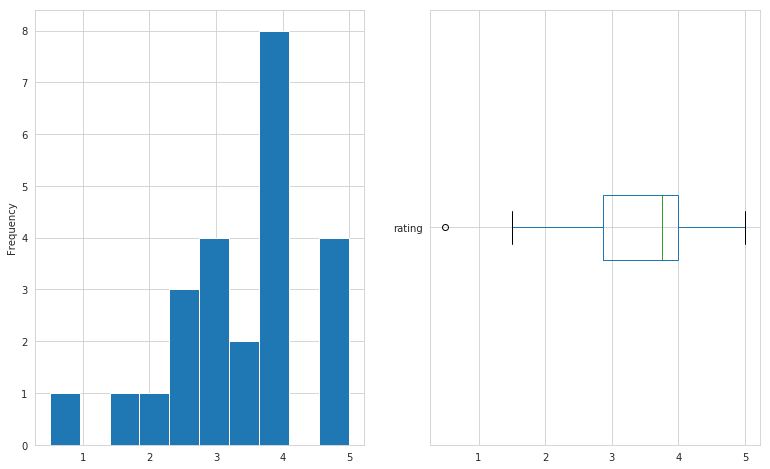

count    24.000000
mean      3.437500
std       1.145051
min       0.500000
25%       2.875000
50%       3.750000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 407

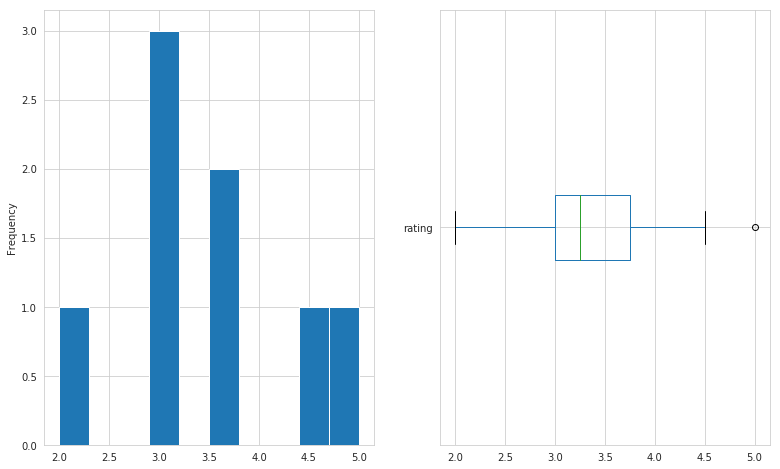

count    8.000000
mean     3.437500
std      0.942546
min      2.000000
25%      3.000000
50%      3.250000
75%      3.750000
max      5.000000
Name: rating, dtype: float64


## Movie Id: 62956

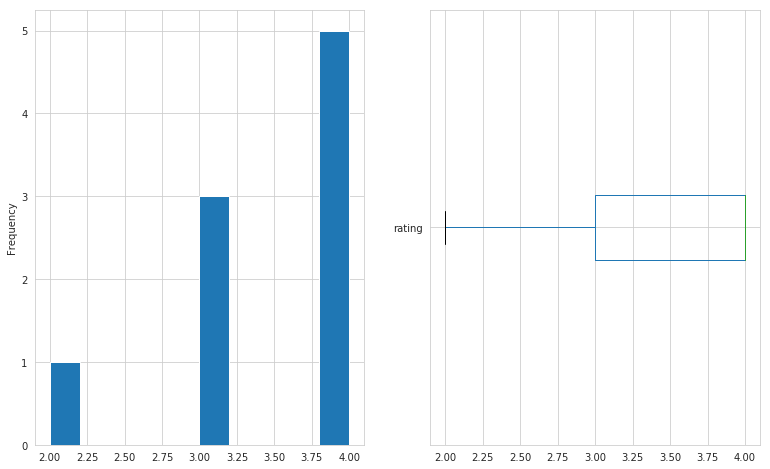

count    9.000000
mean     3.444444
std      0.726483
min      2.000000
25%      3.000000
50%      4.000000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


## Movie Id: 96110

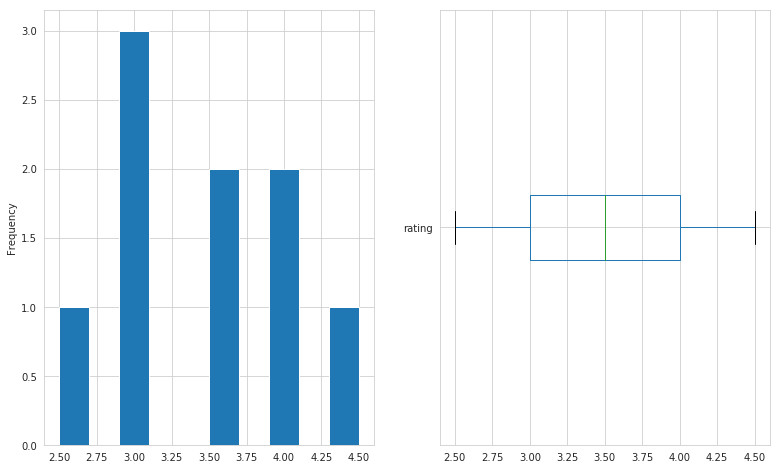

count    9.000000
mean     3.444444
std      0.634648
min      2.500000
25%      3.000000
50%      3.500000
75%      4.000000
max      4.500000
Name: rating, dtype: float64


## Movie Id: 33437

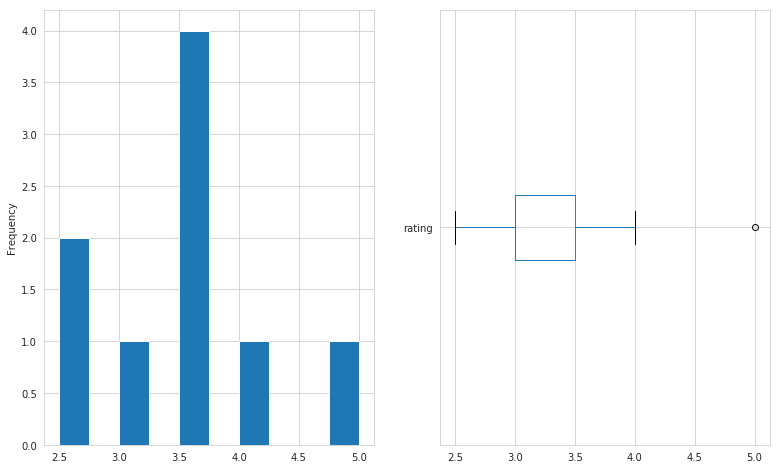

count    9.000000
mean     3.444444
std      0.768295
min      2.500000
25%      3.000000
50%      3.500000
75%      3.500000
max      5.000000
Name: rating, dtype: float64


## Movie Id: 3272

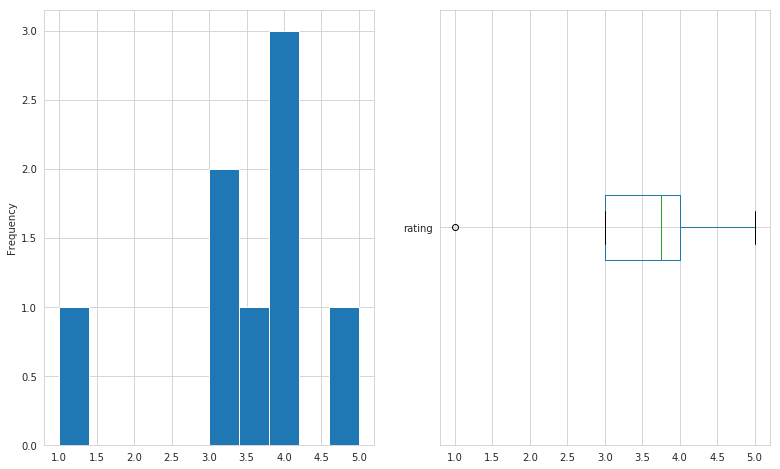

count    8.000000
mean     3.437500
std      1.178301
min      1.000000
25%      3.000000
50%      3.750000
75%      4.000000
max      5.000000
Name: rating, dtype: float64


## Movie Id: 58299

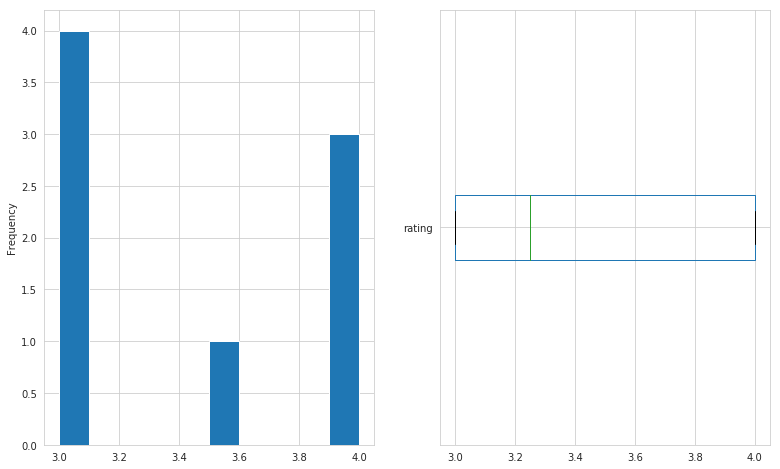

count    8.000000
mean     3.437500
std      0.495516
min      3.000000
25%      3.000000
50%      3.250000
75%      4.000000
max      4.000000
Name: rating, dtype: float64


## Movie Id: 3521

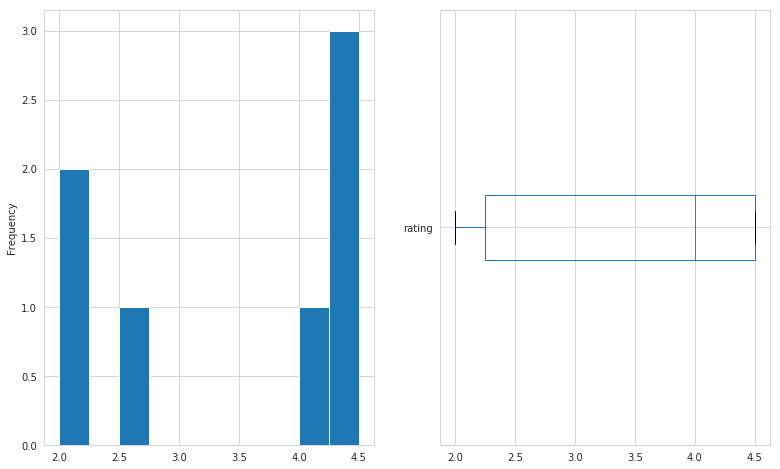

count    7.000000
mean     3.428571
std      1.205148
min      2.000000
25%      2.250000
50%      4.000000
75%      4.500000
max      4.500000
Name: rating, dtype: float64


## Movie Id: 587

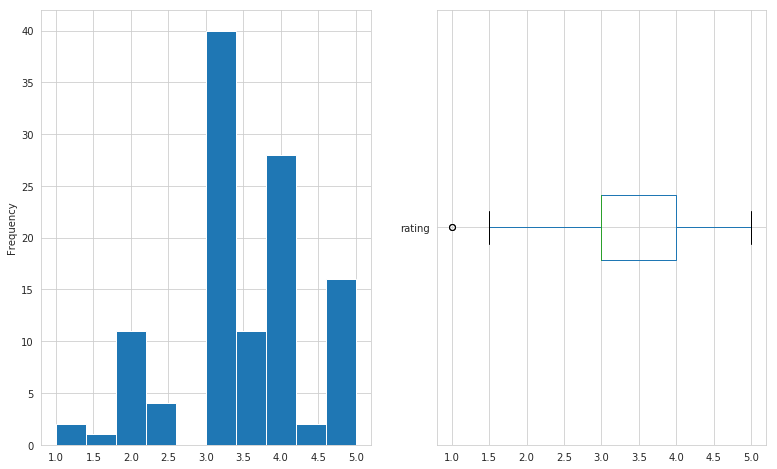

count    115.000000
mean       3.434783
std        0.935465
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: rating, dtype: float64


## Movie Id: 55269

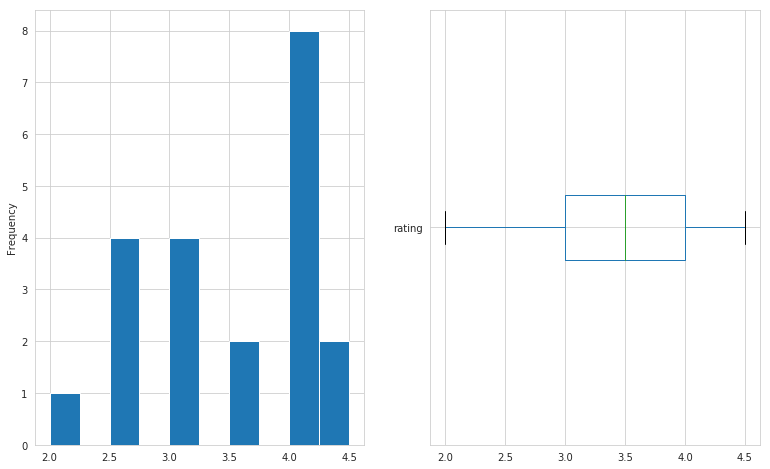

count    21.000000
mean      3.428571
std       0.746420
min       2.000000
25%       3.000000
50%       3.500000
75%       4.000000
max       4.500000
Name: rating, dtype: float64


## Movie Id: 2243

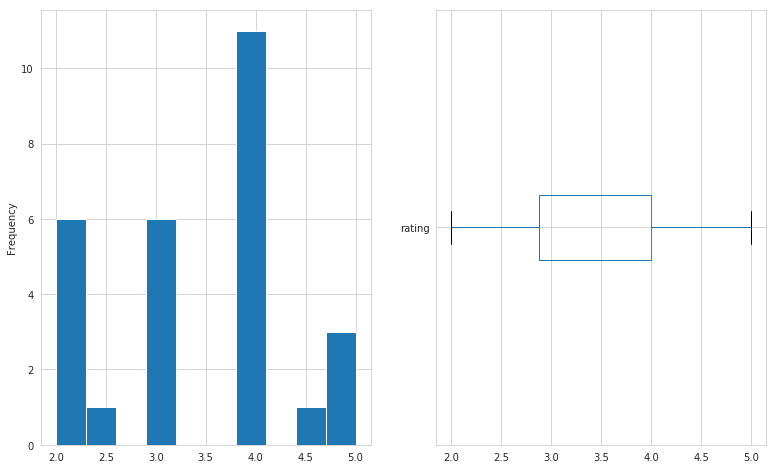

count    28.000000
mean      3.428571
std       0.988024
min       2.000000
25%       2.875000
50%       4.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


## Movie Id: 203

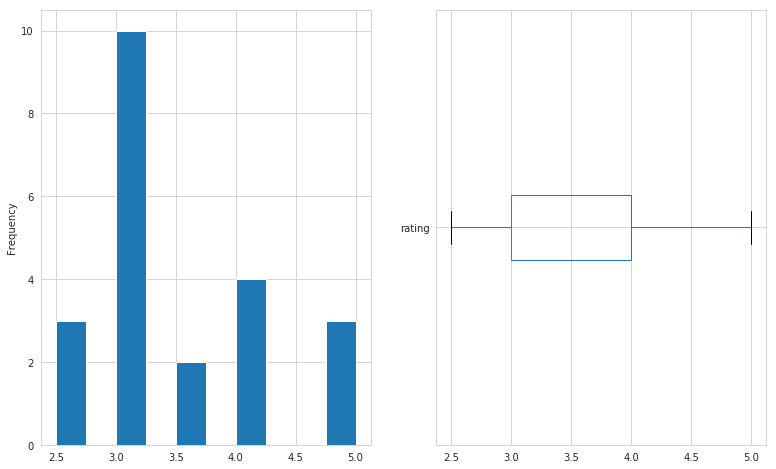

count    22.000000
mean      3.431818
std       0.791254
min       2.500000
25%       3.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64


In [17]:
for ID in filtered_movies['movieId'].values:
    display(Markdown('## Movie Id: ' + str(ID)))
    movie_plot(ID)

## Challenge 7 by [Thiago Gonçalves](https://twitter.com/tgcsantos)

Create a chart of average grades per year (overall average considering all films released that year).

In [18]:
movies_title_year = movies.copy()

movies_title_year['title'] = movies['title'].str.split('(', expand=True).loc[:,0]
movies_title_year['year'] = movies['title'].str.extract("\((\d{4})\)")

movies_title_year.head()

,movieId,title,genres,average_rating,number_of_ratings,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0,1995
1,2,Jumanji,Adventure|Children|Fantasy,3.43,110.0,1995
2,3,Grumpier Old Men,Comedy|Romance,3.26,52.0,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,2.36,7.0,1995
4,5,Father of the Bride Part II,Comedy,3.07,49.0,1995


In [19]:
years = []
years_avg = []

for year in movies_title_year['year']:
    years.append(str(year))

movies_years = set(years)


for year in movies_years:
    year_mean = movies_title_year[movies_title_year['year'] == year]['average_rating'].mean()
    years_avg.append(year_mean)

In [20]:
dic_avg = {'Average_rating_year': years_avg}
movies_avg_rating = pd.DataFrame(dic_avg, index=movies_years)
movies_avg_rating.sort_index(inplace=True)

movies_avg_rating.head()

,Average_rating_year
1902,3.5000
1903,2.5000
1908,4.0000
1915,2.0000
1916,3.5625


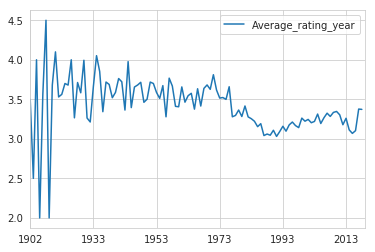

In [21]:
movies_avg_rating.plot()
plt.show()